# **New York City Yellow Taxi Data**
Submission done By: Shivani Sharma

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")



In [3]:
# Import the libraries you will be using for analysis
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r"E:\EDA\Datasets and Dictionary\trip_records")

# Create a list of all the twelve files to read
file_list = os.listdir(r"E:\EDA\Datasets and Dictionary\trip_records")

# initialise an empty dataframe
sampled_df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour
        



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df['date'].unique():
            date_data = df[df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]

                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                

                # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        sampled_df = pd.concat([sampled_df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file sampled_trip_data.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
# Store the df in csv/parquet
# df.to_parquet('')
if len(sampled_df) > 300000:
    sampled_df = sampled_df.sample(n=300000, random_state=42).reset_index(drop=True)

# Save to CSV and Parquet
sampled_df.to_csv("sampled_trip_data.csv", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [43]:
# Load the new data file
df = pd.read_csv("sampled_trip_data.csv", parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])


In [45]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-25 21:49:16   2023-12-25 22:00:59              1.0   
1         2  2023-01-09 14:07:12   2023-01-09 14:15:49              1.0   
2         2  2023-01-10 18:08:52   2023-01-10 18:21:36              1.0   
3         2  2023-02-05 07:02:10   2023-02-05 07:15:31              1.0   
4         2  2023-01-07 22:26:46   2023-01-07 22:36:29              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.84         1.0                  N           162           162   
1           1.28         1.0                  N           211           261   
2           2.17         1.0                  N            13            79   
3           3.61         1.0                  N            75           141   
4           4.97         1.0                  N           132           130   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        3.28           0.0   
1             1  ...      0.5        2.80           0.0   
2             1  ...      0.5        6.21           0.0   
3             1  ...      0.5        2.00           0.0   
4             2  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         19.68                   2.5          NaN   
1                    1.0         16.80                   2.5         0.00   
2                    1.0         26.91                   2.5         0.00   
3                    1.0         25.10                   2.5          NaN   
4                    1.0         24.95                   0.0         1.25   

         date  hour Airport_fee  
0  2023-12-25    21         0.0  
1  2023-01-09    14         NaN  
2  2023-01-10    18         NaN  
3  2023-02-05     7         0.0  
4  2023-01-07    22         NaN  

[5 rows x 22 columns]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[ns]
 3   passenger_count        289907 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289907 non-null  float64       
 6   store_and_fwd_flag     289907 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [49]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.drop('store_and_fwd_flag', axis=1, inplace=True)


In [51]:
# Fixing the data types of the columns
df['RatecodeID'] = df['RatecodeID'].astype('Int64')
df['passenger_count'] = df['passenger_count'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[ns]
 3   passenger_count        289907 non-null  Int64         
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289907 non-null  Int64         
 6   PULocationID           300000 non-null  int64         
 7   DOLocationID           300000 non-null  int64         
 8   payment_type           300000 non-null  int64         
 9   fare_amount            300000 non-null  float64       
 10  extra                  300000 non-null  float64       
 11  mta_tax                300000 non-null  float64       
 12  tip_amount             300000 non-null  floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [53]:
# Combine the two airport fee columns
df['airport_fee_combined'] = df['airport_fee'].fillna(df['Airport_fee'])
df.drop(['airport_fee', 'Airport_fee'], axis=1, inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [55]:
# check where values of fare amount are negative
pd.DataFrame({
    'Column': df.columns.values,
    'Negative-Value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns]
}).round(3)


Column  Negative-Value(%)
0                VendorID              0.000
1    tpep_pickup_datetime              0.000
2   tpep_dropoff_datetime              0.000
3         passenger_count              0.000
4           trip_distance              0.000
5              RatecodeID              0.000
6            PULocationID              0.000
7            DOLocationID              0.000
8            payment_type              0.000
9             fare_amount              0.000
10                  extra              0.000
11                mta_tax              0.004
12             tip_amount              0.000
13           tolls_amount              0.000
14  improvement_surcharge              0.004
15           total_amount              0.004
16   congestion_surcharge              0.002
17                   date              0.000
18                   hour              0.000
19   airport_fee_combined              0.001

Did you notice something different in the `RatecodeID` column for above records?

In [57]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_df = df[df['fare_amount'] < 0]

# Analyze the distribution of RatecodeID for negative fare_amount
ratecode_analysis = negative_fare_df['RatecodeID'].value_counts()
ratecode_analysis.head()


Series([], Name: count, dtype: Int64)

In [59]:
# Find which columns have negative values
numeric_cols = df.select_dtypes(include=['number']).columns
negative_columns = []

for col in numeric_cols:
    if (df[col] < 0).any():
        negative_columns.append(col)

print("Columns with negative values:", negative_columns)


Columns with negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']


In [61]:
# fix these negative values
negative_cols = ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']
for col in negative_cols:
    df.loc[df[col] < 0, col] = df[col].abs()
    
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-25 21:49:16   2023-12-25 22:00:59                1   
1         2  2023-01-09 14:07:12   2023-01-09 14:15:49                1   
2         2  2023-01-10 18:08:52   2023-01-10 18:21:36                1   
3         2  2023-02-05 07:02:10   2023-02-05 07:15:31                1   
4         2  2023-01-07 22:26:46   2023-01-07 22:36:29                1   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.84           1           162           162             1   
1           1.28           1           211           261             1   
2           2.17           1            13            79             1   
3           3.61           1            75           141             1   
4           4.97           1           132           130             2   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         11.4    1.0      0.5        3.28           0.0   
1         10.0    0.0      0.5        2.80           0.0   
2         14.2    2.5      0.5        6.21           0.0   
3         19.1    0.0      0.5        2.00           0.0   
4         21.2    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge        date  \
0                    1.0         19.68                   2.5  2023-12-25   
1                    1.0         16.80                   2.5  2023-01-09   
2                    1.0         26.91                   2.5  2023-01-10   
3                    1.0         25.10                   2.5  2023-02-05   
4                    1.0         24.95                   0.0  2023-01-07   

   hour  airport_fee_combined  
0    21                  0.00  
1    14                  0.00  
2    18                  0.00  
3     7                  0.00  
4    22                  1.25

In [63]:
#Checking if any columns still have negative values
pd.DataFrame({
    'Column': df.columns.values,
    'Negative-Value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns]
}).round(3)

Column  Negative-Value(%)
0                VendorID                0.0
1    tpep_pickup_datetime                0.0
2   tpep_dropoff_datetime                0.0
3         passenger_count                0.0
4           trip_distance                0.0
5              RatecodeID                0.0
6            PULocationID                0.0
7            DOLocationID                0.0
8            payment_type                0.0
9             fare_amount                0.0
10                  extra                0.0
11                mta_tax                0.0
12             tip_amount                0.0
13           tolls_amount                0.0
14  improvement_surcharge                0.0
15           total_amount                0.0
16   congestion_surcharge                0.0
17                   date                0.0
18                   hour                0.0
19   airport_fee_combined                0.0

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




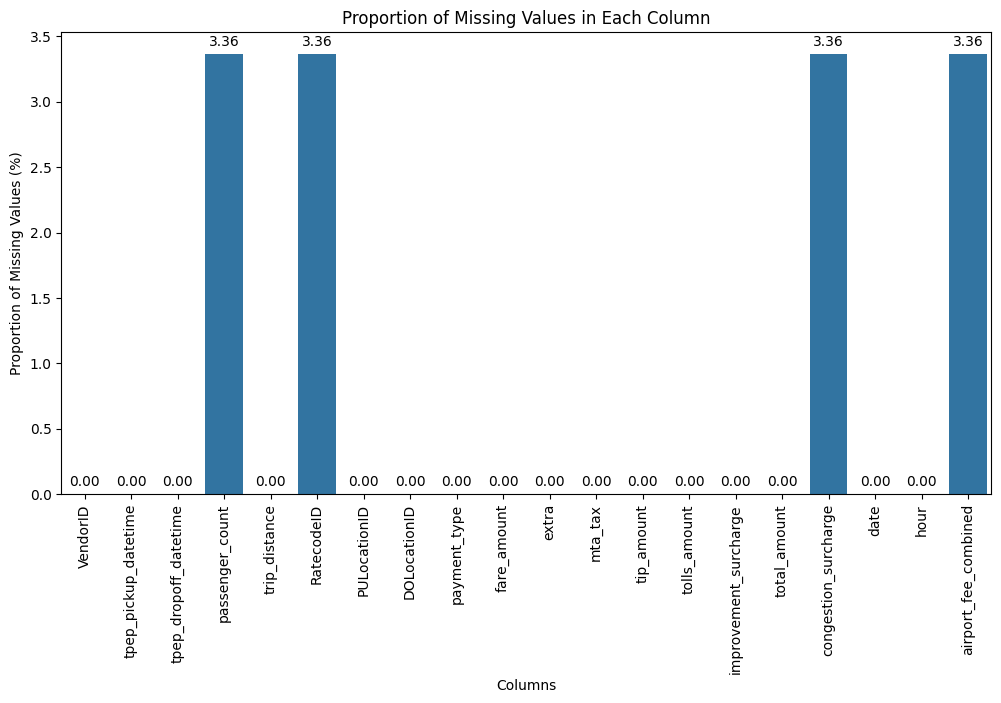

In [65]:
# Using below function to show a bar plot
def render_bar_plot(x, y, title, xlabel, ylabel, figsize=(12, 6), show_data_labels=False):
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    
    if show_data_labels:
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    
    plt.show()

# Find the proportion of missing values in each column

# Calculate the proportion of missing values in each column
missing_values = df.isna().mean() * 100
render_bar_plot(missing_values.index, missing_values.values, 'Proportion of Missing Values in Each Column', 'Columns', 'Proportion of Missing Values (%)', show_data_labels=True)



**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [67]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
df["passenger_count"] = df["passenger_count"].astype(int)
print(f"Missing value (%) 'passenger_count': {df['passenger_count'].isna().mean() * 100}%")

Missing value (%) 'passenger_count': 0.0%


In [71]:
# Fix zero values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())
print(f"Missing value (%) 'passenger_count': {(df['passenger_count'] == 0).sum() / len(df) * 100}%")

Missing value (%) 'passenger_count': 0.0%


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [73]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].value_counts()

RatecodeID
1     273644
2      11375
99      1732
5       1605
3        948
4        602
6          1
Name: count, dtype: Int64

In [79]:
#####Based on the values distribution, we can replace the null values with 1. In addition, there are unexpected value of (99.0) with 1732 occurrence. We can replace these with 1 as well.

# replace null with 1
df['RatecodeID'].fillna(1, inplace=True)
# replace 99.0 with 1
df['RatecodeID'] = df['RatecodeID'].replace(99.0, 1)
df["RatecodeID"] = df["RatecodeID"].astype(int)
df['RatecodeID'].value_counts()

RatecodeID
1    285469
2     11375
5      1605
3       948
4       602
6         1
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [82]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].value_counts()



congestion_surcharge
2.5    267504
0.0     22403
Name: count, dtype: int64

In [84]:
df["congestion_surcharge"].fillna(df["congestion_surcharge"].median(), inplace=True)
print(f"Missing value (%) 'congestion_surcharge': {df['congestion_surcharge'].isna().mean() * 100}%")

Missing value (%) 'congestion_surcharge': 0.0%


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [86]:
# Handle any remaining missing values
missing_values = df.isna().mean() * 100
print(missing_values)


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
date                     0.000000
hour                     0.000000
airport_fee_combined     3.364333
dtype: float64


In [88]:
missing_count = df['airport_fee_combined'].isna().sum()
missing_percentage = df['airport_fee_combined'].isna().mean() * 100
print(f"Number of missing values: {missing_count}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Number of missing values: 10093
Percentage of missing values: 3.36%


In [90]:
#Fixing missing values in 'airport_fee_combined'
df['airport_fee_combined'].fillna(0.0, inplace=True)

missing_count = df['airport_fee_combined'].isna().sum()
print(f"Number of missing values: {missing_count}")

Number of missing values: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

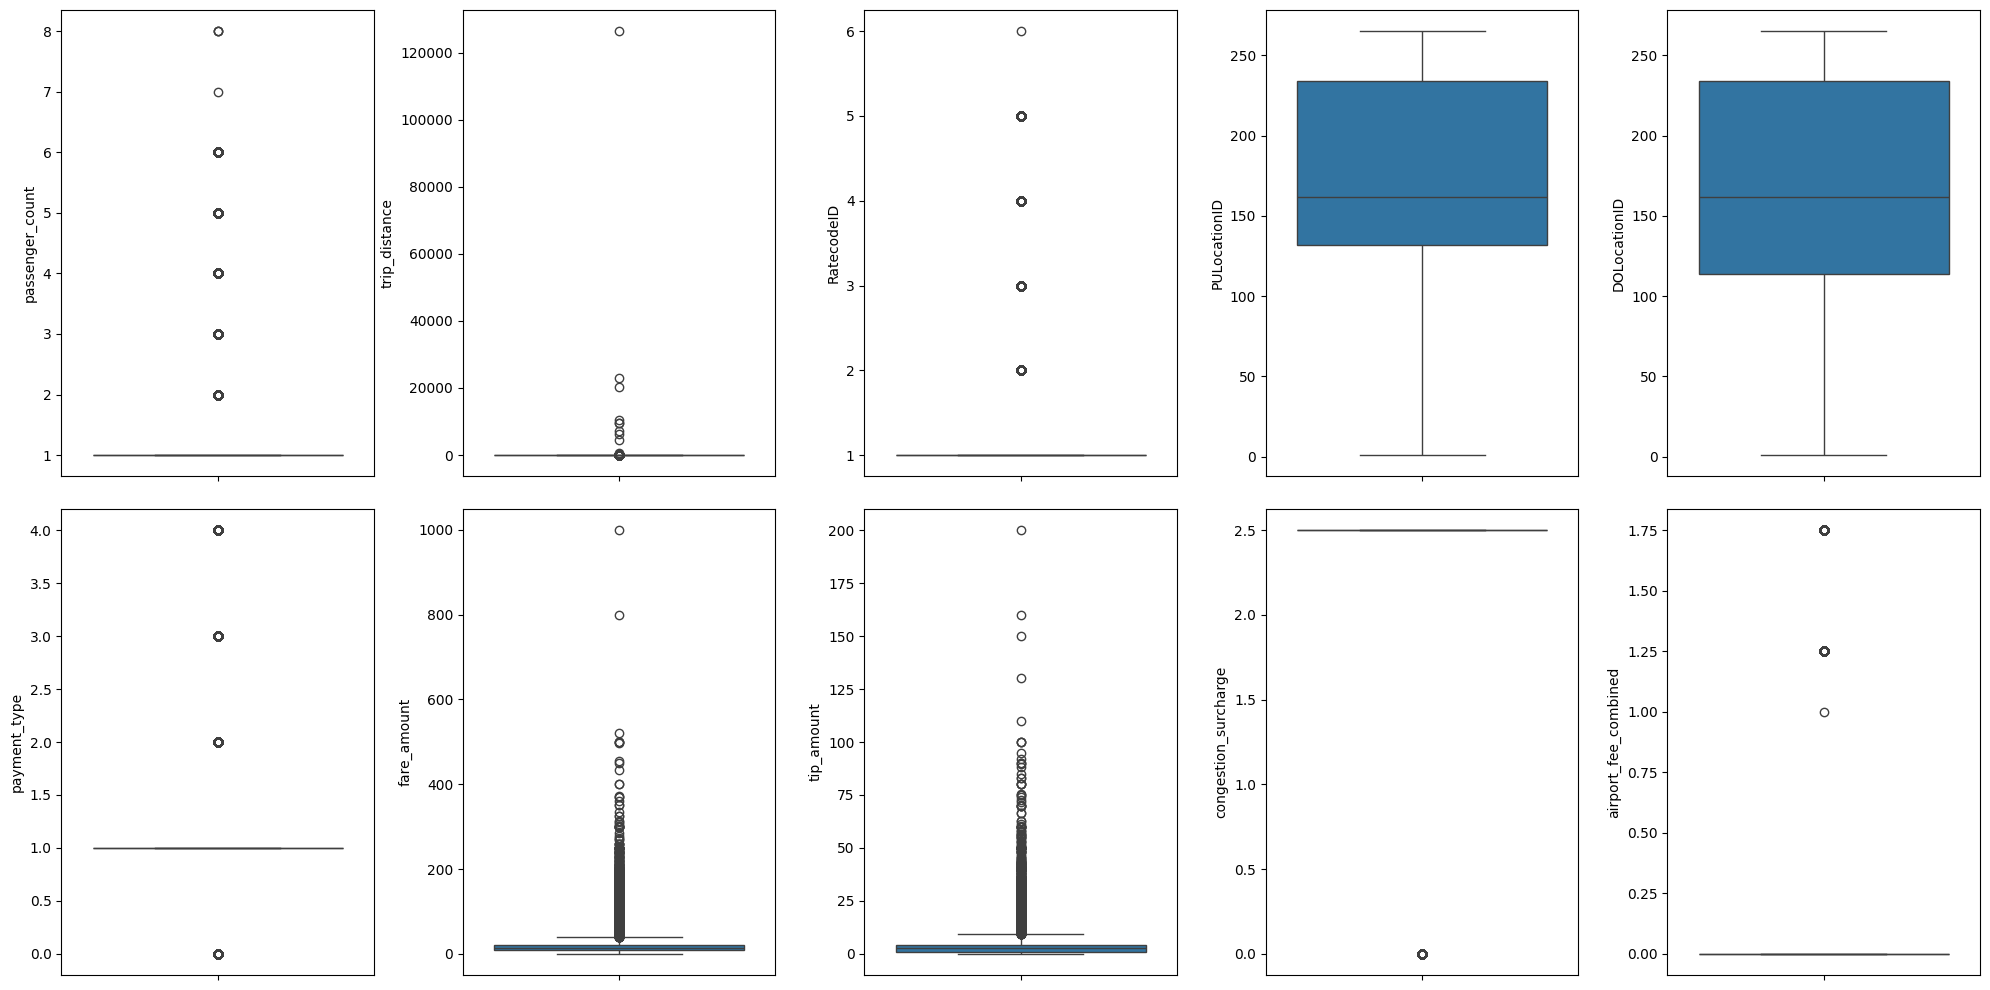

In [92]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
numerical_columns = ['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount', 'congestion_surcharge', 'airport_fee_combined']
numerical_columns_len = len(numerical_columns)
rows = int(len(numerical_columns) / 2)
fig, axs = plt.subplots(ncols=int(len(numerical_columns) / 2), nrows=2, figsize=(20, 2 * rows))

axs = axs.flatten() if numerical_columns_len > 1 else [axs]  # Ensure axs is iterable
for index, col in enumerate(numerical_columns):
    sns.boxplot(y=col, data=df, ax=axs[index])

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

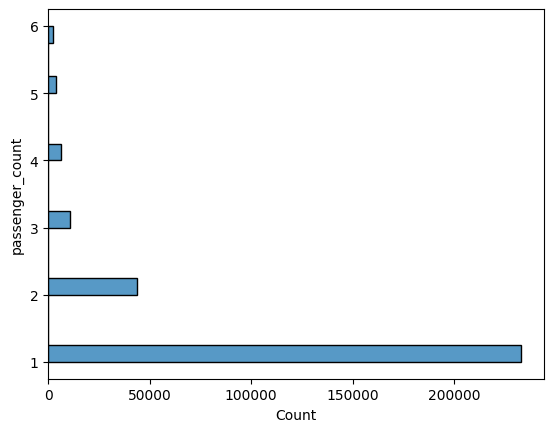

In [94]:
# remove passenger_count > 6
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

# Plot the distribution of passenger_count
sns.histplot(y=df['passenger_count'], data=df)
plt.show()

In [98]:
#Remove trips where trip_distance is nearly 0 and fare_amount is more than 300
outlier_fareamt = (df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300)
print(f"Removing {outlier_fareamt.sum()} rows: Zero/near-zero trip distance with high fare")
df = df[~outlier_fareamt]

Removing 8 rows: Zero/near-zero trip distance with high fare


In [100]:
#Remove trips where both trip_distance and fare_amount are 0, but pickup and dropoff zones are different
outlier_zones = (df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])
print(f"Removing {outlier_zones.sum()} rows: Zero distance and fare with different zones")
df = df[~outlier_zones]

Removing 12 rows: Zero distance and fare with different zones


In [102]:
#Remove trips where trip_distance is more than 250 miles (likely data entry errors)
outlier_distance = (df['trip_distance'] > 250)
print(f"Removing {outlier_distance.sum()} rows: Trip distance greater than 250 miles")
df = df[~outlier_distance]


Removing 3 rows: Trip distance greater than 250 miles


In [104]:
#Remove rows where payment_type is 0 (invalid payment type)
outlier_paymenttype = (df['payment_type'] == 0)
print(f"Removing {outlier_paymenttype.sum()} rows: Invalid payment type 0")
df = df[~outlier_paymenttype]

Removing 0 rows: Invalid payment type 0


In [108]:
# Do any columns need standardising?
#As the data is primarily numerical, there is no need for standardization. Keeping the original scale ensures interpretability, particularly for monetary values and other numerical variables.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [110]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

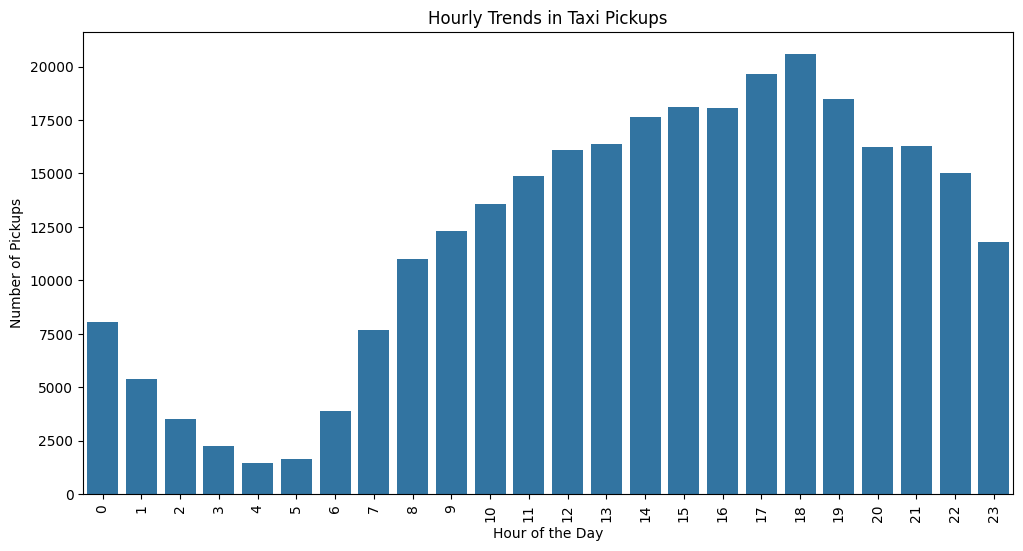

In [112]:
# Find and show the hourly trends in taxi pickups

# Extract the hour from the pickup datetime
df['pickup_time_derived'] = df['tpep_pickup_datetime'].dt.hour

# Calculate the number of pickups for each hour
hourly_pickups = df['pickup_time_derived'].value_counts().sort_index()

# Plot the hourly trends in taxi pickups
render_bar_plot(hourly_pickups.index, hourly_pickups.values, 'Hourly Trends in Taxi Pickups', 'Hour of the Day', 'Number of Pickups')


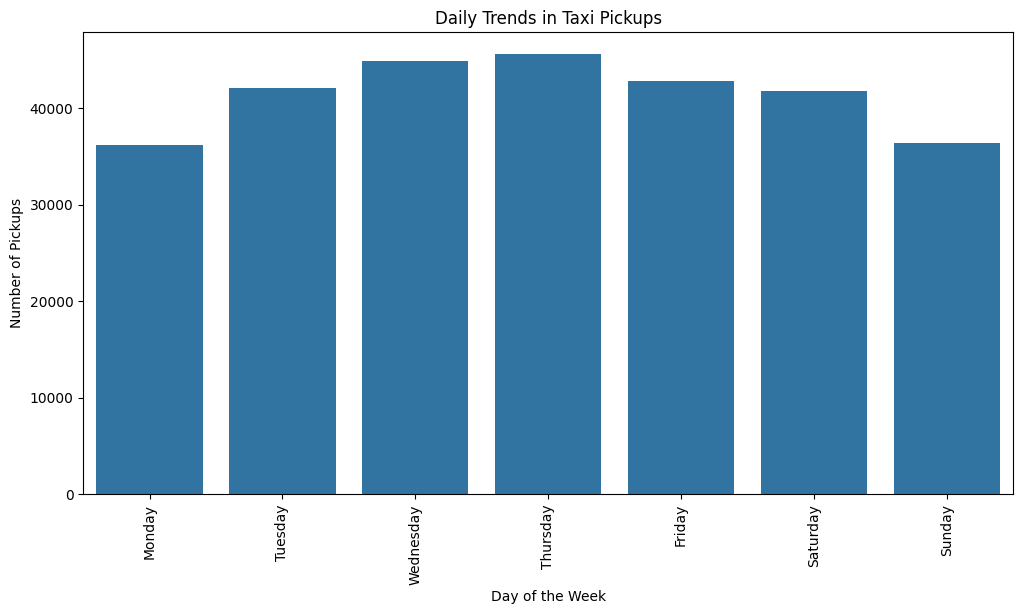

In [114]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract the day of the week from the pickup datetime
df['pickup_day_derived'] = df['tpep_pickup_datetime'].dt.dayofweek

# Map the day of the week to the corresponding day name
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day_name_derived'] = df['pickup_day_derived'].map(day_name_map)

# Calculate the number of pickups for each day of the week
daily_pickups = df['pickup_day_name_derived'].value_counts().reindex(day_name_map.values())

# Plot the daily trends in taxi pickups
render_bar_plot(daily_pickups.index, daily_pickups.values, 'Daily Trends in Taxi Pickups', 'Day of the Week', 'Number of Pickups')


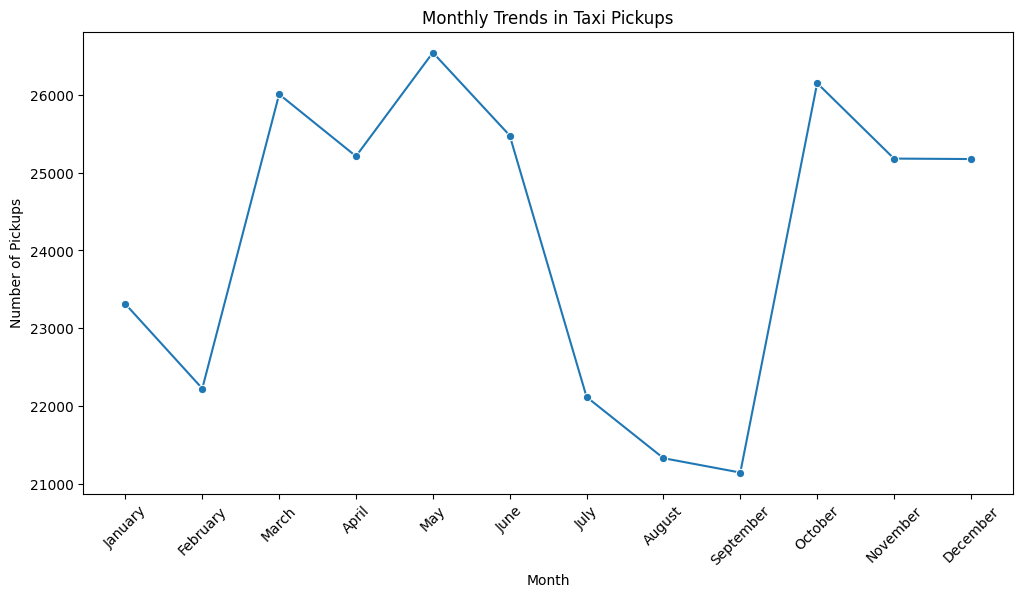

In [116]:
# Show the monthly trends in pickups


# Use below function to show a line plot
def render_line_plot(x, y, title, xlabel, ylabel, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Extract the month from the pickup datetime
df['pickup_month_derived'] = df['tpep_pickup_datetime'].dt.month

# Map the month number to the corresponding month name
month_name_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['pickup_month_name_derived'] = df['pickup_month_derived'].map(month_name_map)

# Calculate the number of pickups for each month
monthly_pickups = df['pickup_month_name_derived'].value_counts().reindex(month_name_map.values())

# Plot the monthly trends in taxi pickups
render_line_plot(monthly_pickups.index.astype(str), monthly_pickups.values, 'Monthly Trends in Taxi Pickups', 'Month', 'Number of Pickups')

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [118]:
# Analyse the above parameters
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df[financial_columns].describe()


fare_amount     tip_amount   total_amount  trip_distance
count  289880.000000  289880.000000  289880.000000  289880.000000
mean       19.722109       3.574272      28.837251       3.440733
std        18.230068       4.075813      22.843814       4.530442
min         0.000000       0.000000       0.000000       0.000000
25%         9.300000       1.000000      15.960000       1.050000
50%        13.500000       2.860000      21.000000       1.790000
75%        21.900000       4.450000      30.700000       3.360000
max       800.000000     200.000000     801.000000     101.900000

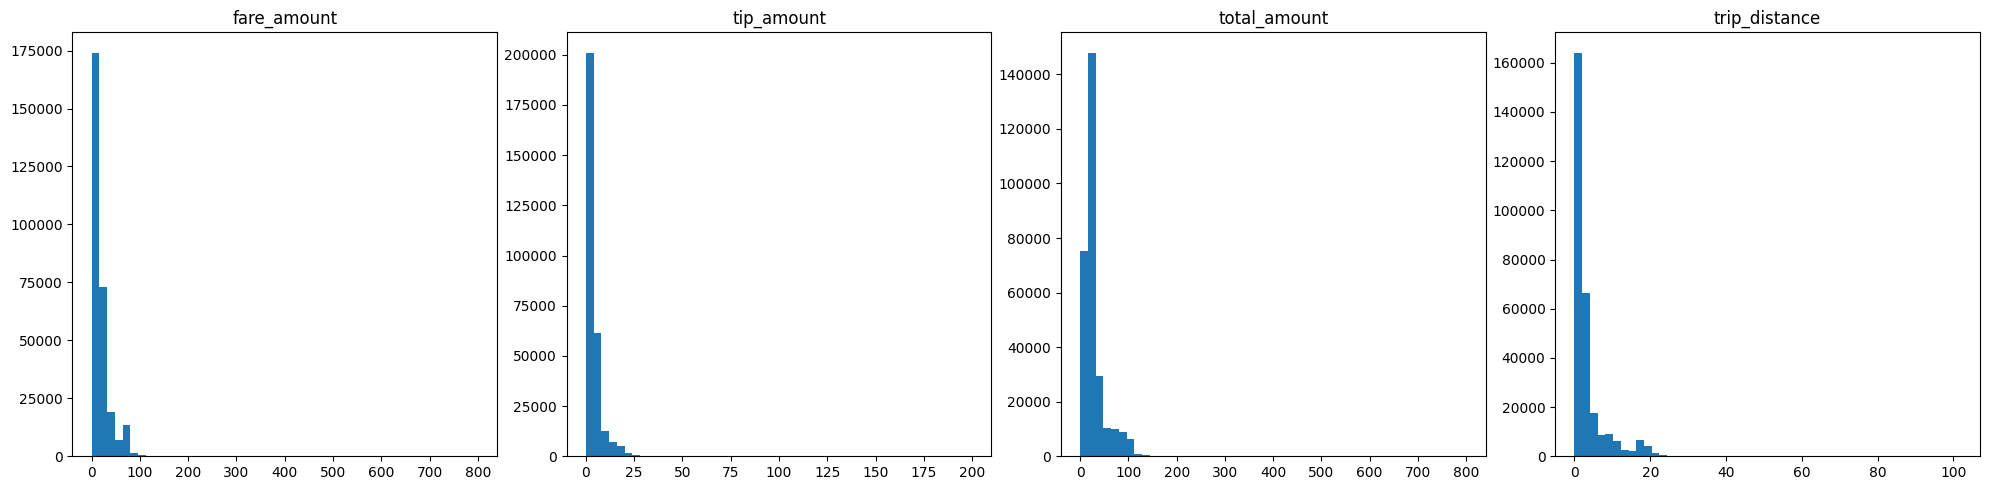

In [120]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))

for axs, col in zip(axs.flatten(), financial_columns):
    axs.hist(df[col], bins=50)
    axs.set_title(col)

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [122]:
# Create a df with non zero entries for the selected parameters.
non_zero_df = df[(df['fare_amount'] != 0) & (df['tip_amount'] != 0) & (df['total_amount'] != 0) & (df['trip_distance'] != 0)]

# Display the first few rows of the new DataFrame
non_zero_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-25 21:49:16   2023-12-25 22:00:59                1   
1         2  2023-01-09 14:07:12   2023-01-09 14:15:49                1   
2         2  2023-01-10 18:08:52   2023-01-10 18:21:36                1   
3         2  2023-02-05 07:02:10   2023-02-05 07:15:31                1   
5         2  2023-06-15 19:43:40   2023-06-15 19:55:17                1   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.84           1           162           162             1   
1           1.28           1           211           261             1   
2           2.17           1            13            79             1   
3           3.61           1            75           141             1   
5           1.20           1           141           237             1   

   fare_amount  ...  total_amount  congestion_surcharge        date  hour  \
0         11.4  ...         19.68                   2.5  2023-12-25    21   
1         10.0  ...         16.80                   2.5  2023-01-09    14   
2         14.2  ...         26.91                   2.5  2023-01-10    18   
3         19.1  ...         25.10                   2.5  2023-02-05     7   
5         11.4  ...         23.27                   2.5  2023-06-15    19   

   airport_fee_combined  pickup_time_derived  pickup_day_derived  \
0                   0.0                   21                   0   
1                   0.0                   14                   0   
2                   0.0                   18                   1   
3                   0.0                    7                   6   
5                   0.0                   19                   3   

  pickup_day_name_derived  pickup_month_derived  pickup_month_name_derived  
0                  Monday                    12                   December  
1                  Monday                     1                    January  
2                 Tuesday                     1                    January  
3                  Sunday                     2                   February  
5                Thursday                     6                       June  

[5 rows x 25 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

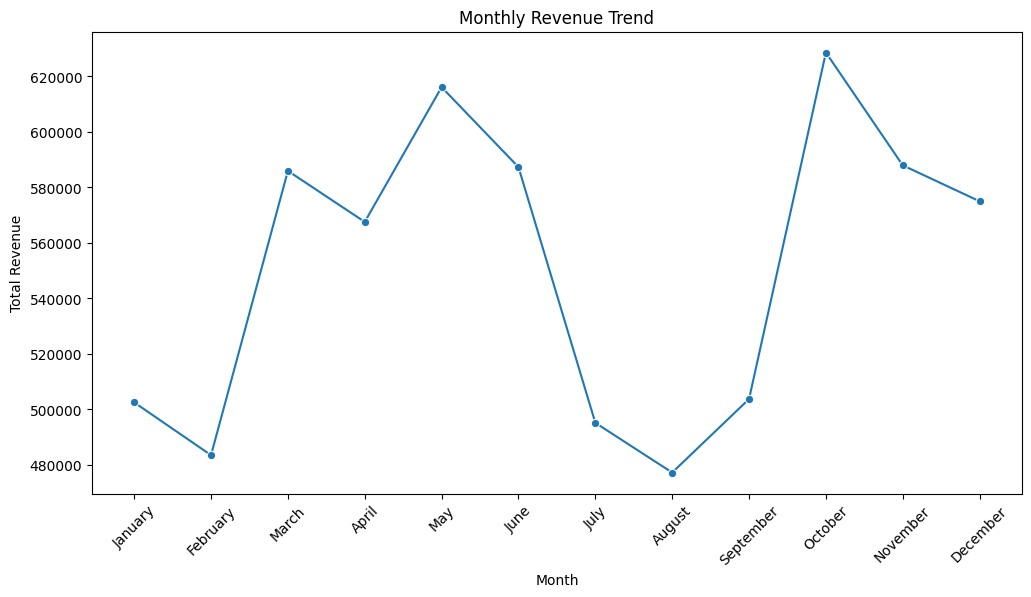

In [124]:
# Group data by month and analyse monthly revenue
monthly_revenue = non_zero_df.groupby('pickup_month_name_derived')['total_amount'].sum().reindex(month_name_map.values())

# Plot the monthly revenue trend using a line chart
render_line_plot(monthly_revenue.index, monthly_revenue.values, 'Monthly Revenue Trend', 'Month', 'Total Revenue')


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

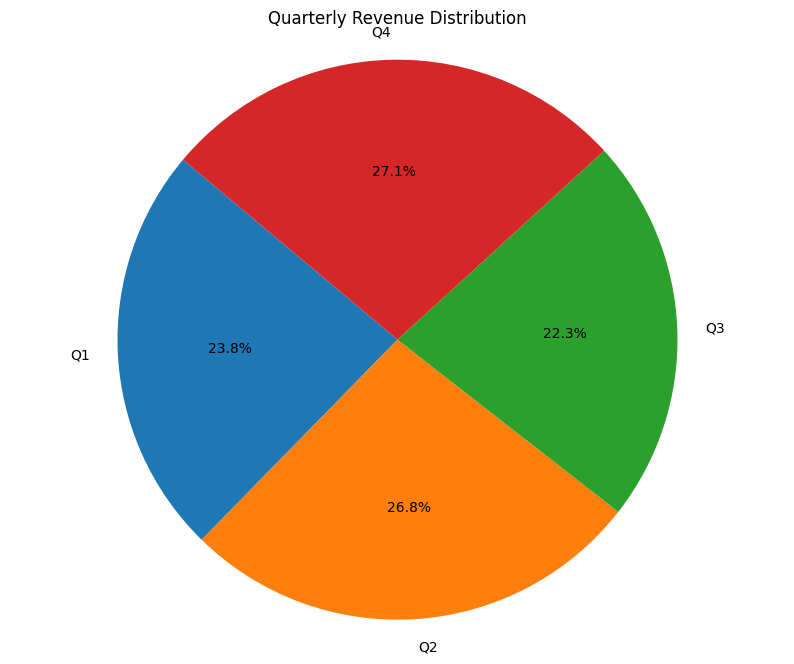

In [126]:
# Calculate proportion of each quarter

# Define a function to map months to quarters
def month_to_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# Apply the function to create a new column for quarters
non_zero_df['pickup_quarter_derived'] = non_zero_df['pickup_month_derived'].apply(month_to_quarter)

# Group data by quarter and calculate the total revenue for each quarter
quarterly_revenue = non_zero_df.groupby('pickup_quarter_derived')['total_amount'].sum()

# Plot the quarterly revenue distribution using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(quarterly_revenue, labels=quarterly_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Quarterly Revenue Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

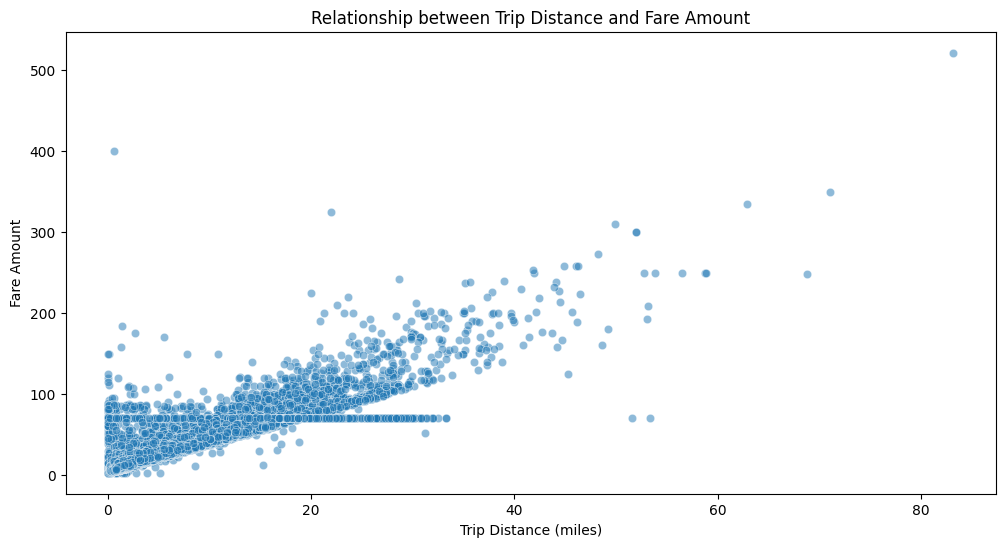

Correlation between Trip Distance and Fare Amount: 0.95


In [128]:
# Show how trip fare is affected by distance

# Use below function to show a scatter plot
def render_scatter_plot(x, y, data, title, xlabel, ylabel, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x, y=y, data=data, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Filter out trips with trip_distance = 0
filtered_df = non_zero_df[non_zero_df['trip_distance'] > 0]

# Plot the relationship between trip_distance and fare_amount
render_scatter_plot('trip_distance', 'fare_amount', filtered_df, 'Relationship between Trip Distance and Fare Amount', 'Trip Distance (miles)', 'Fare Amount')

# Calculate the correlation value between trip_distance and fare_amount
correlation_value = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f'Correlation between Trip Distance and Fare Amount: {correlation_value:.2f}')

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

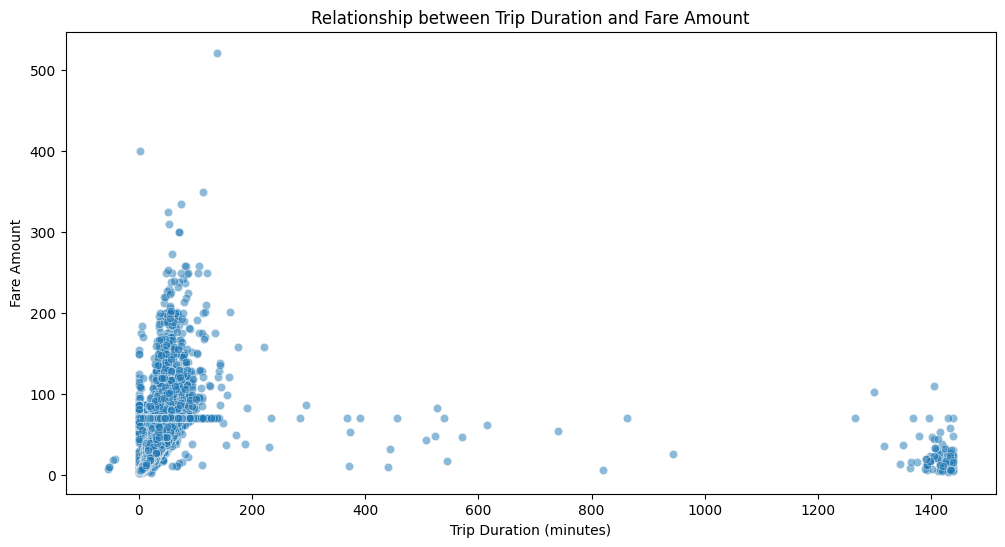

Correlation between Trip Duration and Fare Amount: 0.32


In [130]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
non_zero_df['trip_duration_derived'] = (non_zero_df['tpep_dropoff_datetime'] - non_zero_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Plot the relationship between fare_amount and trip_duration
render_scatter_plot('trip_duration_derived', 'fare_amount', non_zero_df, 'Relationship between Trip Duration and Fare Amount', 'Trip Duration (minutes)', 'Fare Amount')

# Calculate the correlation value between trip_duration and fare_amount
correlation_value_duration_fare = non_zero_df['trip_duration_derived'].corr(non_zero_df['fare_amount'])
print(f'Correlation between Trip Duration and Fare Amount: {correlation_value_duration_fare:.2f}')

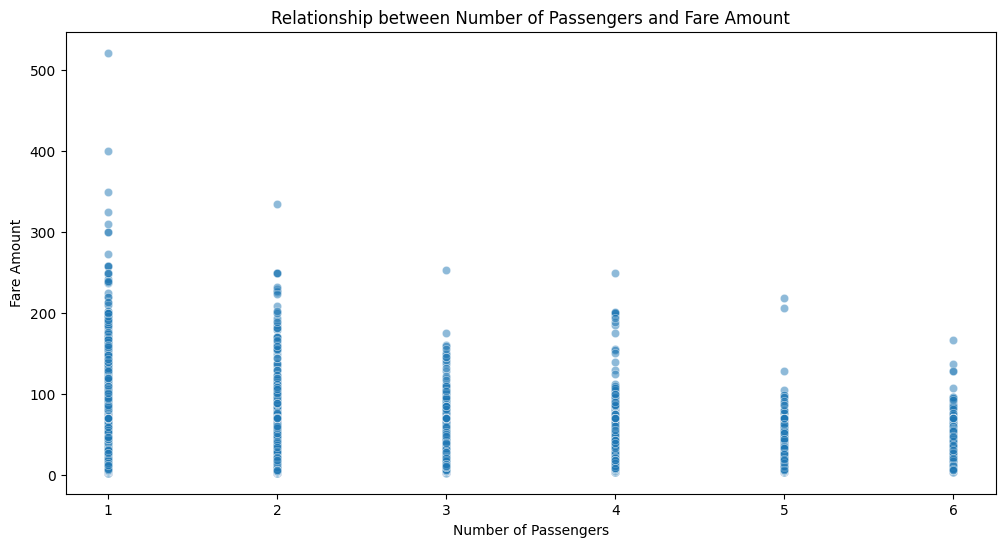

Correlation between Number of Passengers and Fare Amount: 0.04


In [132]:
# Show relationship between fare and number of passengers

# Plot the relationship between fare_amount and passenger_count
render_scatter_plot('passenger_count', 'fare_amount', non_zero_df, 'Relationship between Number of Passengers and Fare Amount', 'Number of Passengers', 'Fare Amount')

# Calculate the correlation value between passenger_count and fare_amount
correlation_value_passenger_fare = non_zero_df['passenger_count'].corr(non_zero_df['fare_amount'])
print(f'Correlation between Number of Passengers and Fare Amount: {correlation_value_passenger_fare:.2f}')


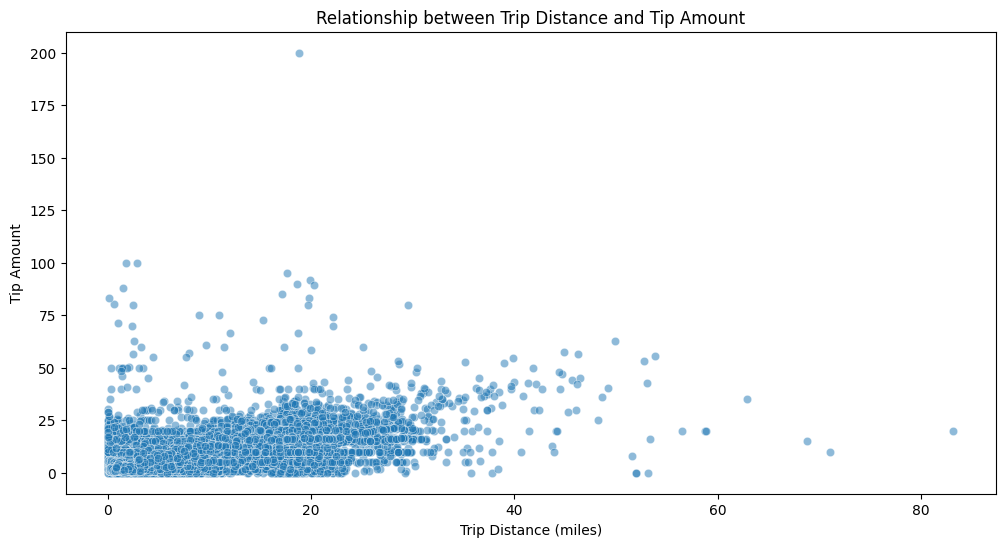

Correlation between Trip Distance and Tip Amount: 0.80


In [134]:
# Show relationship between tip and trip distance

# Plot the relationship between tip_amount and trip_distance
render_scatter_plot('trip_distance', 'tip_amount', non_zero_df, 'Relationship between Trip Distance and Tip Amount', 'Trip Distance (miles)', 'Tip Amount')

# Calculate the correlation value between trip_distance and tip_amount
correlation_value_tip_distance = non_zero_df['trip_distance'].corr(non_zero_df['tip_amount'])
print(f'Correlation between Trip Distance and Tip Amount: {correlation_value_tip_distance:.2f}')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

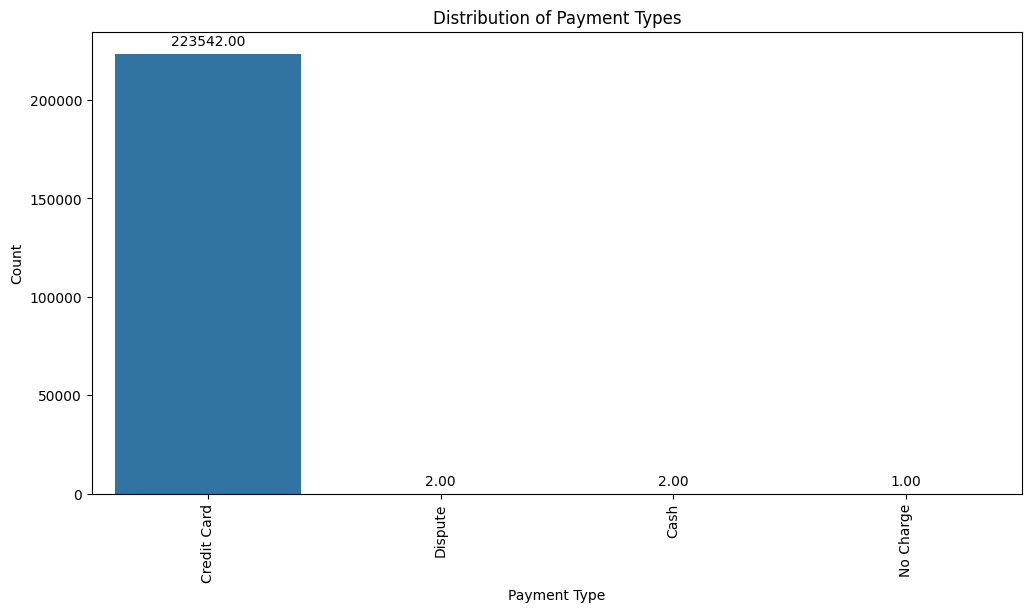

In [136]:
# Analyse the distribution of different payment types (payment_type).

# Get the count of each payment type
payment_type_counts = non_zero_df['payment_type'].value_counts()

# Map the payment type codes to their corresponding descriptions
payment_type_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Replace the payment type codes with descriptions
payment_type_counts.index = payment_type_counts.index.map(payment_type_map)

# Plot the distribution of payment types
render_bar_plot(payment_type_counts.index, payment_type_counts.values, 'Distribution of Payment Types', 'Payment Type', 'Count', show_data_labels=True)



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [138]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [140]:
import geopandas as gpd

# Read the shapefile using geopandas
TAXI_ZONE_DATASET_DIRECTORY_NAME = 'taxi_zones'
TAXI_ZONE_DATASET_FILE_NAME = 'taxi_zones.shp'
TAXI_ZONE_DATASET_FILE_PATH = os.path.join(os.getcwd(), TAXI_ZONE_DATASET_DIRECTORY_NAME, TAXI_ZONE_DATASET_FILE_NAME)


# Read the shapefile using geopandas
zones = gpd.read_file(TAXI_ZONE_DATASET_FILE_PATH)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

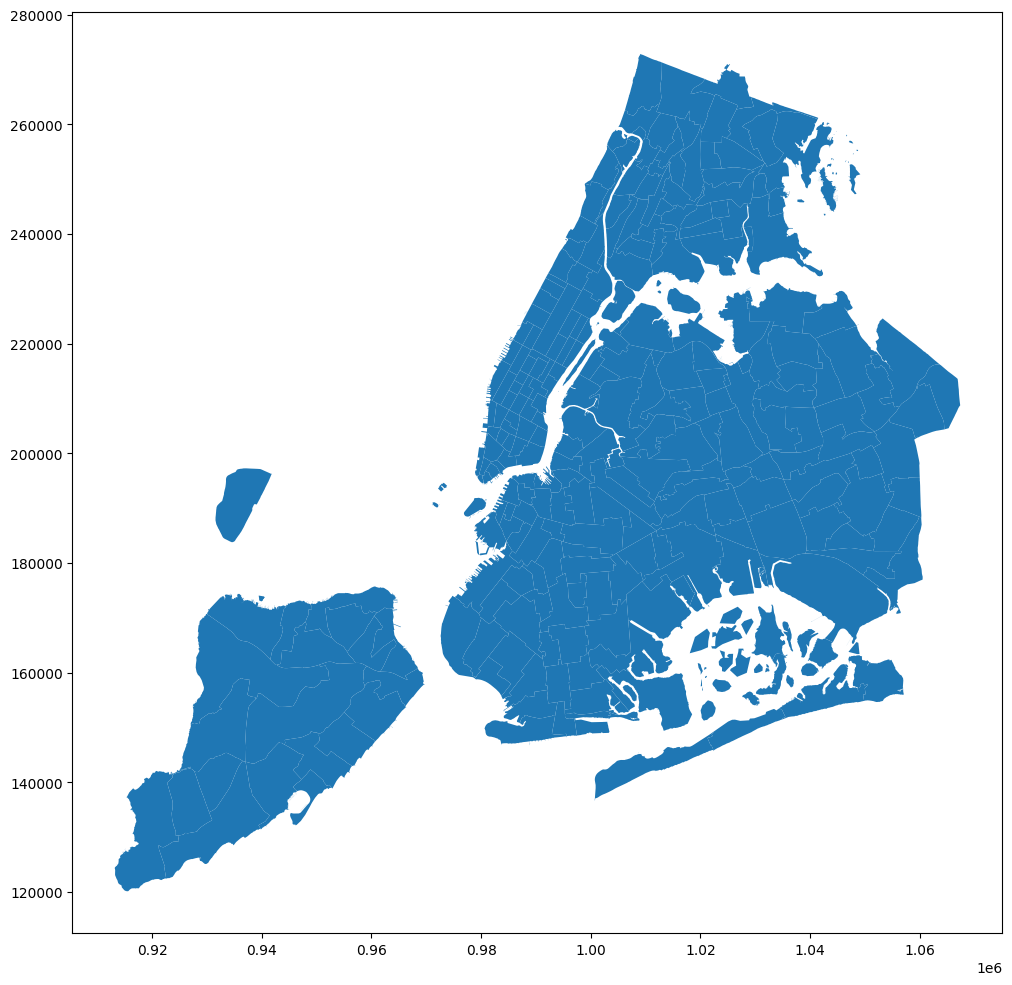

In [144]:
print(zones.info())
zones.plot(figsize=(12, 12))

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [146]:
# Merge zones and trip records using locationID and PULocationID

merged_df = non_zero_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the first few rows of the merged DataFrame
merged_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-25 21:49:16   2023-12-25 22:00:59                1   
1         2  2023-01-09 14:07:12   2023-01-09 14:15:49                1   
2         2  2023-01-10 18:08:52   2023-01-10 18:21:36                1   
3         2  2023-02-05 07:02:10   2023-02-05 07:15:31                1   
4         2  2023-06-15 19:43:40   2023-06-15 19:55:17                1   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.84           1           162           162             1   
1           1.28           1           211           261             1   
2           2.17           1            13            79             1   
3           3.61           1            75           141             1   
4           1.20           1           141           237             1   

   fare_amount  ...  pickup_month_name_derived  pickup_quarter_derived  \
0         11.4  ...                   December                      Q4   
1         10.0  ...                    January                      Q1   
2         14.2  ...                    January                      Q1   
3         19.1  ...                   February                      Q1   
4         11.4  ...                       June                      Q2   

   trip_duration_derived  OBJECTID  Shape_Leng  Shape_Area               zone  \
0              11.716667     162.0    0.035270    0.000048       Midtown East   
1               8.616667     211.0    0.025235    0.000040               SoHo   
2              12.733333      13.0    0.050281    0.000149  Battery Park City   
3              13.350000      75.0    0.087664    0.000241  East Harlem South   
4              11.616667     141.0    0.041514    0.000077    Lenox Hill West   

  LocationID    borough                                           geometry  
0      162.0  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...  
1      211.0  Manhattan  POLYGON ((983827.65 201526.658, 983727.737 201...  
2       13.0  Manhattan  POLYGON ((980801.31 201248.869, 980697.386 200...  
3       75.0  Manhattan  POLYGON ((1000577.175 228028.553, 1001238.138 ...  
4      141.0  Manhattan  POLYGON ((994839.073 216123.698, 994786.74 216...  

[5 rows x 34 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [148]:
# Group data by location and calculate the number of trips

trips_per_location = merged_df.groupby('PULocationID').size().reset_index(name='total_trips')

# Display the first few rows of the result
trips_per_location.head()

PULocationID  total_trips
0             1            6
1             4          230
2             6            1
3             7           44
4            10           38

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

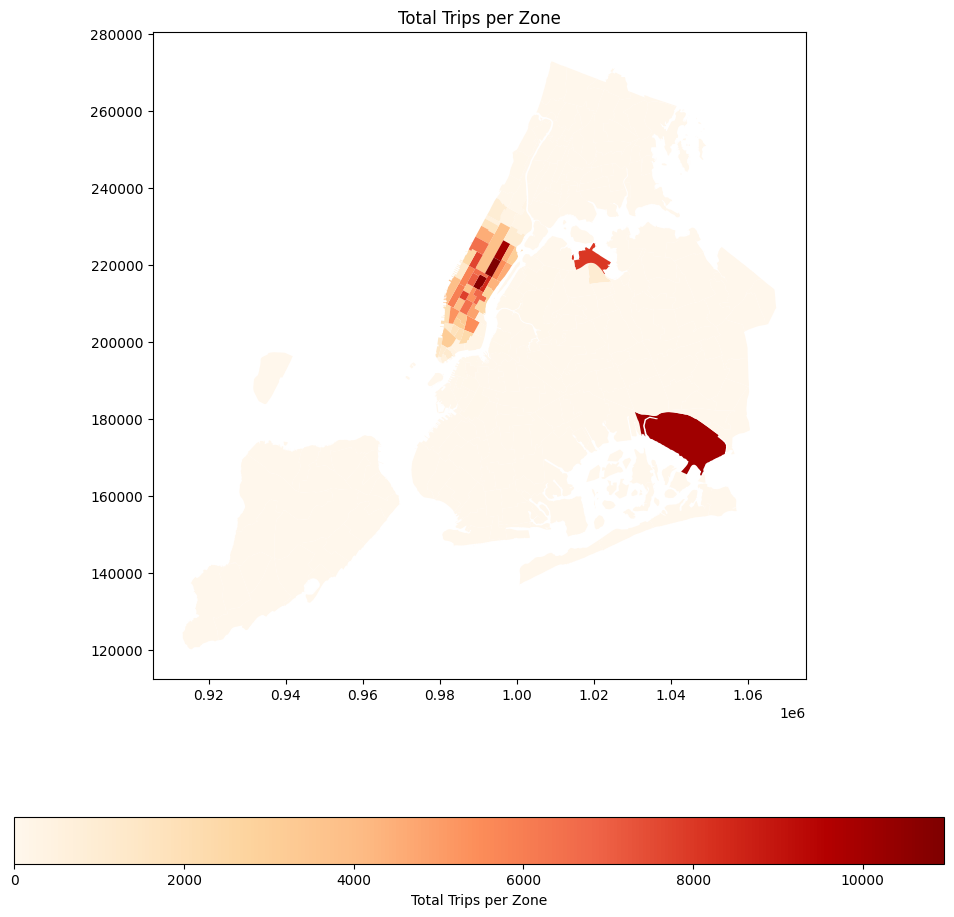

In [150]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values with 0 (for zones with no trips)
zones_with_trips['total_trips'].fillna(0, inplace=True)

# Plot the map of zones showing total trips per zone
zones_with_trips.plot(column='total_trips', cmap='OrRd', legend=True, legend_kwds={'label': "Total Trips per Zone", 'orientation': "horizontal"}, figsize=(12, 12))
plt.title('Total Trips per Zone')
plt.show()



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

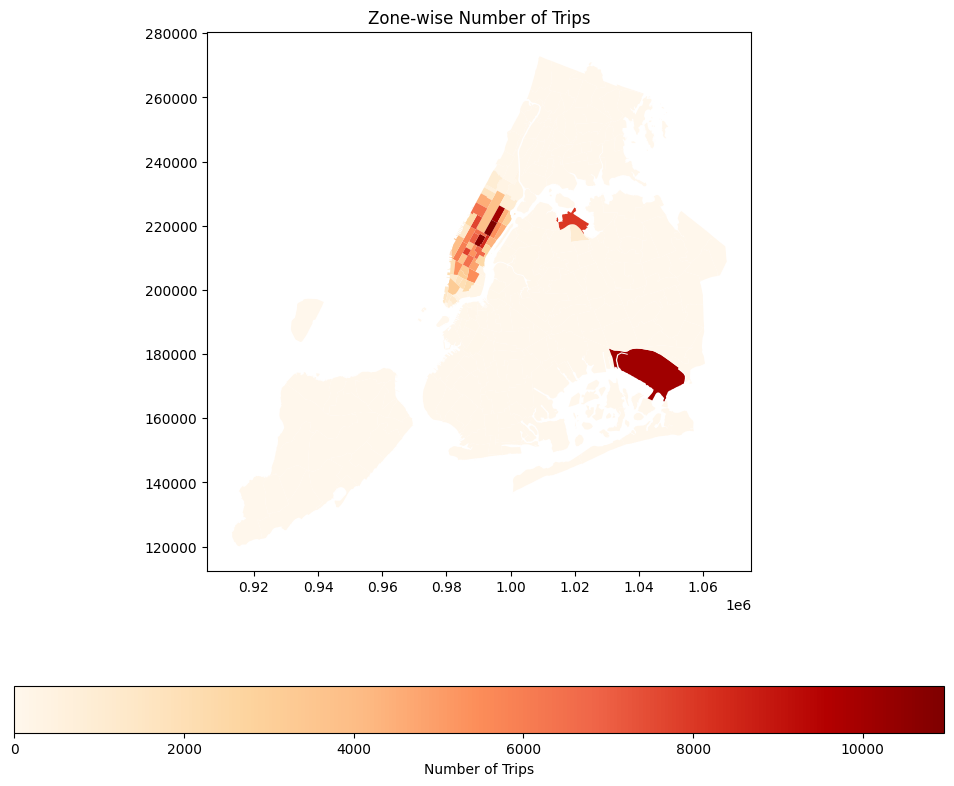

In [152]:
# Define figure and axis


# Plot the map and display it

# Assuming df contains the trip data and zones is a GeoDataFrame with zone geometries

# Aggregate the number of trips per zone using PULocationID
zone_trip_counts = merged_df['PULocationID'].value_counts().reset_index()
zone_trip_counts.columns = ['LocationID', 'trip_count']

# Merge the trip counts with the GeoDataFrame
zones = zones.merge(zone_trip_counts, on='LocationID', how='left')

# Fill NaN values with 0 (if there are zones with no trips)
zones['trip_count'] = zones['trip_count'].fillna(0)

# Define the figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the GeoDataFrame with the trip counts
zones.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"}, cmap='OrRd')

# Display the plot
plt.title('Zone-wise Number of Trips')
plt.show()



In [154]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the zones by the number of trips
zones_sorted = zones.sort_values(by='trip_count', ascending=False)

# Display the sorted zones
zones_sorted[['zone', 'trip_count']]

zone  trip_count
236  Upper East Side South     10961.0
160         Midtown Center     10766.0
131            JFK Airport     10077.0
235  Upper East Side North      9998.0
161           Midtown East      8434.0
..                     ...         ...
152            Marble Hill         0.0
45             City Island         0.0
149        Manhattan Beach         0.0
148                Madison         0.0
50              Co-Op City         0.0

[263 rows x 2 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [156]:
# Find routes which have the slowest speeds at different times of the day

# Group by pickup and dropoff locations and hour of the day
grouped = merged_df.groupby(['PULocationID', 'DOLocationID', 'pickup_time_derived'])

# Calculate the average trip duration and distance for each group
route_stats = grouped.agg({
    'trip_duration_derived': 'mean',
    'trip_distance': 'mean'
}).reset_index()

# Calculate the speed for each route and hour
route_stats['speed'] = route_stats['trip_distance'] / (route_stats['trip_duration_derived'] / 60)  # speed in miles per hour

# Identify slow routes (e.g., routes with speed less than a threshold, say 10 mph)
slow_routes = route_stats[route_stats['speed'] < 10]

# Display the slow routes
slow_routes.head()



PULocationID  DOLocationID  pickup_time_derived  trip_duration_derived  \
7              4             4                   22               0.600000   
9              4            13                   17              26.733333   
19             4            45                    1              10.166667   
20             4            45                    8               7.633333   
28             4            66                   22              32.200000   

    trip_distance     speed  
7            0.06  6.000000  
9            3.94  8.842893  
19           1.46  8.616393  
20           1.20  9.432314  
28           4.45  8.291925

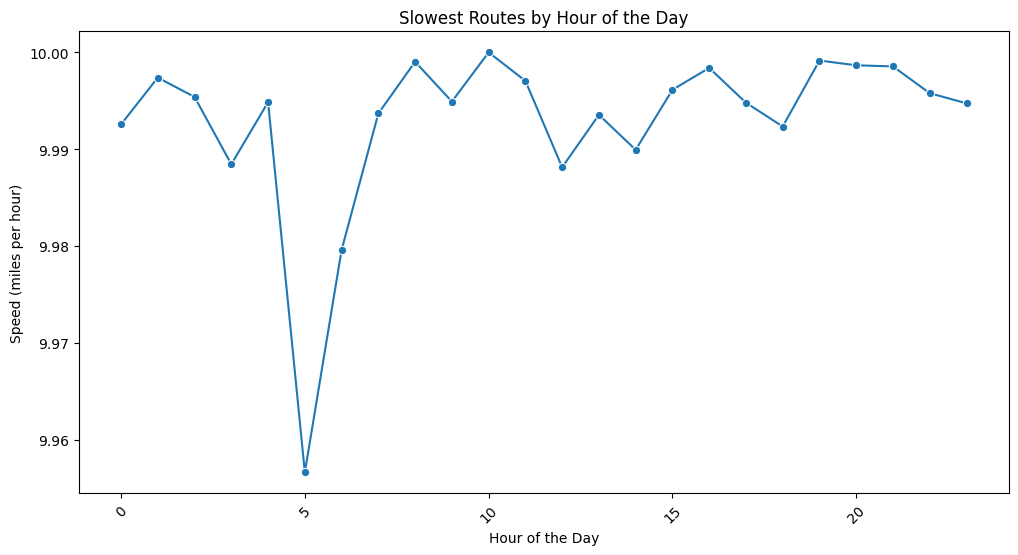

In [158]:
# Find routes which have the slowest speeds at different times of the day
slow_routes_by_hour = slow_routes.groupby('pickup_time_derived').apply(lambda x: x.nlargest(1, 'speed')).reset_index(drop=True)
render_line_plot(slow_routes_by_hour.pickup_time_derived, slow_routes_by_hour.speed, 'Slowest Routes by Hour of the Day', 'Hour of the Day', 'Speed (miles per hour)')

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

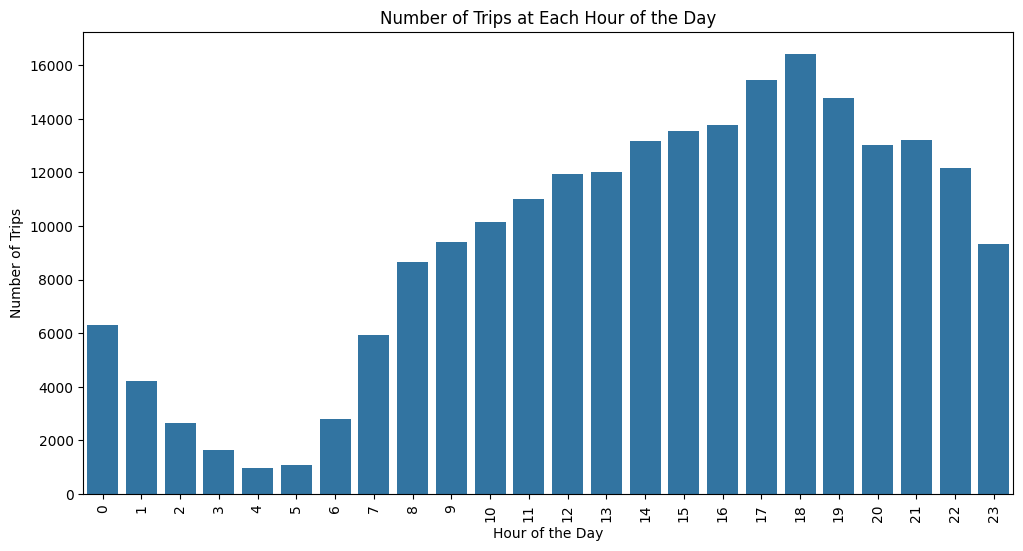

The busiest hour is 18:00 with 16419 trips.


In [160]:
# Visualise the number of trips per hour and find the busiest hour

# Calculate the number of trips for each hour of the day
hourly_trip_counts = merged_df['pickup_time_derived'].value_counts().sort_index()

# Plot the number of trips for each hour of the day
render_bar_plot(hourly_trip_counts.index, hourly_trip_counts.values, 'Number of Trips at Each Hour of the Day', 'Hour of the Day', 'Number of Trips')

# Find the busiest hour and show the number of trips for that hour
busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_trips = hourly_trip_counts.max()
print(f'The busiest hour is {busiest_hour}:00 with {busiest_hour_trips} trips.')

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [162]:
# Scale up the number of trips
busiest_hours = hourly_trip_counts.nlargest(5)

# Display the actual number of trips in the five busiest hours
print("Actual number of trips in the five busiest hours:")
busiest_hours




Actual number of trips in the five busiest hours:


pickup_time_derived
18    16419
17    15439
19    14782
16    13757
15    13562
Name: count, dtype: int64

In [164]:
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =10

# Scale up the number of trips
scaled_trips_per_location = trips_per_location.copy()
scaled_trips_per_location['total_trips'] *= sample_fraction

# Display the scaled-up number of trips
scaled_trips_per_location.head()

PULocationID  total_trips
0             1           60
1             4         2300
2             6           10
3             7          440
4            10          380

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

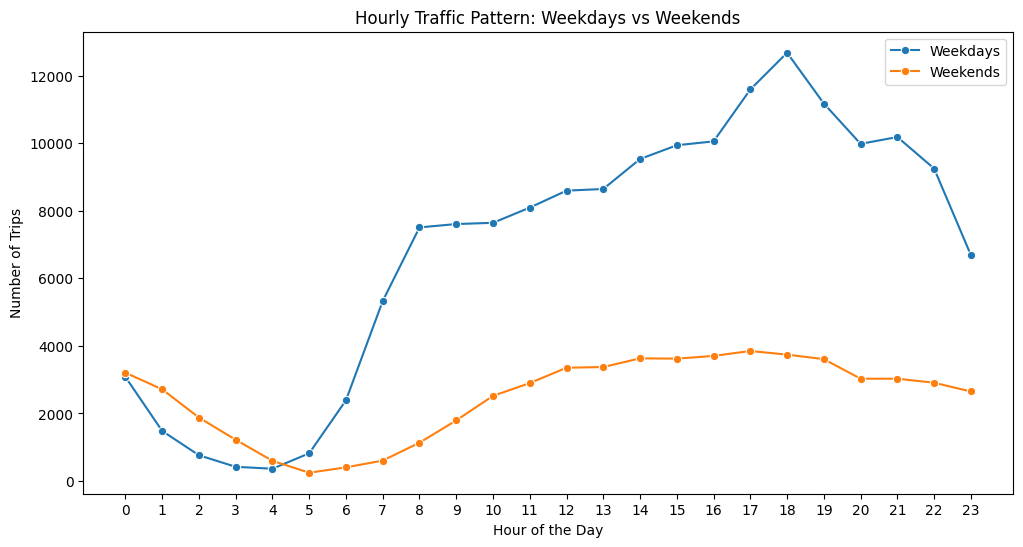

In [166]:
# Compare traffic trends for the week days and weekends

# Separate the data into weekdays and weekends
weekdays_df = merged_df[merged_df['pickup_day_derived'] < 5]  # Monday to Friday
weekends_df = merged_df[merged_df['pickup_day_derived'] >= 5]  # Saturday and Sunday

# Calculate the number of trips for each hour of the day for weekdays
weekday_hourly_pickups = weekdays_df['pickup_time_derived'].value_counts().sort_index()

# Calculate the number of trips for each hour of the day for weekends
weekend_hourly_pickups = weekends_df['pickup_time_derived'].value_counts().sort_index()

# Plot the hourly traffic pattern for weekdays
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekday_hourly_pickups.index, y=weekday_hourly_pickups.values, marker='o', label='Weekdays')
sns.lineplot(x=weekend_hourly_pickups.index, y=weekend_hourly_pickups.values, marker='o', label='Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xticks(range(24))
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [174]:
From the above patterns, we can infer the following:
1.**Peak Hours**:
    The highest demand for taxi pickups typically occurs in the late afternoon and early evening (around 5 PM to 7 PM). This pattern is likely influenced by people commuting home after work or heading to social activities.

2.**Low-Demand Hours**:
    The early morning hours (2 AM to 5 AM) experience the lowest demand, as most individuals are asleep, leading to fewer taxi requests.

3.**Weekday vs. Weekend Patterns**:
    Traffic patterns differ between weekdays and weekends. Weekdays show more defined peaks during morning and evening rush hours, whereas weekends have a more consistent flow throughout the day.

4.**Monthly Variations**:
    The number of taxi trips and revenue generated can vary by month. For example, May and October tend to record higher revenues, possibly due to favorable weather or special events.

5.**Revenue Insights**:
    Revenue distribution indicates that specific months and quarters make a larger contribution to total earnings. Understanding this can aid in developing effective marketing strategies and promotions.

Finding busy and quiet hours for each day helps in several ways:

1. **Resource Allocation**: 
    Company can allocate their resources more efficiently by deploying more taxis during busy hours and fewer during quiet hours. This ensures that there are enough taxis available to meet demand without having too many idle taxis.

2. **Driver Scheduling**: 
    Drivers can be scheduled to work during peak hours to maximize their earnings. This can also help in reducing driver fatigue by avoiding long hours during quiet periods.

3. **Dynamic Pricing**: 
    Implementing dynamic pricing strategies, such as surge pricing during peak hours, can help manage demand and increase revenue. Conversely, offering discounts during quiet hours can attract more customers.

4. **Operational Efficiency**: 
    Understanding traffic patterns can help in identifying bottlenecks and inefficiencies in routes. This information can be used to optimize routes and reduce trip durations.

5. **Customer Experience**: 
    By ensuring that taxis are readily available during busy hours, customer satisfaction can be improved. Additionally, providing incentives for rides during quiet hours can enhance the overall customer experience.

Overall, analyzing these patterns allows for better decision-making and strategic planning to improve operational efficiency, increase revenue, and enhance customer satisfaction.

SyntaxError: invalid syntax (3316224873.py, line 1)

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

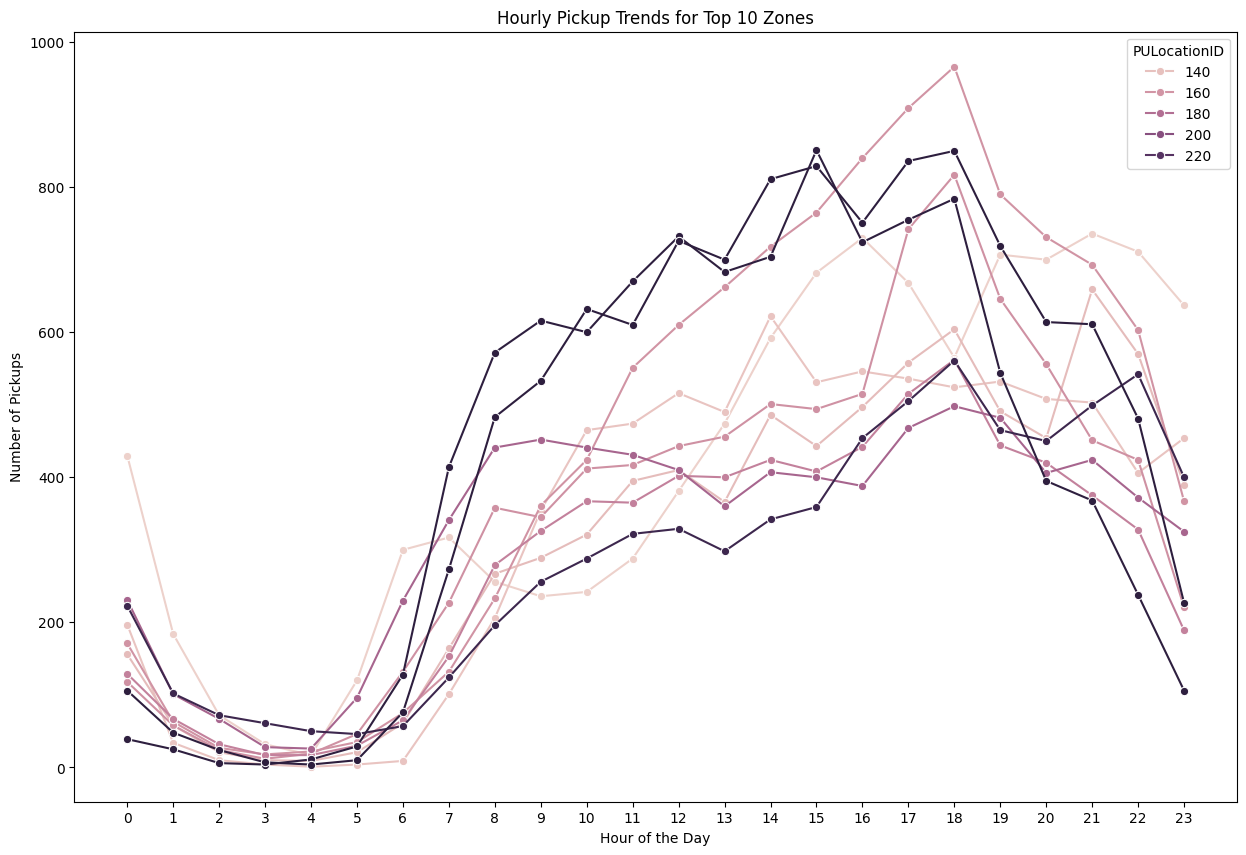

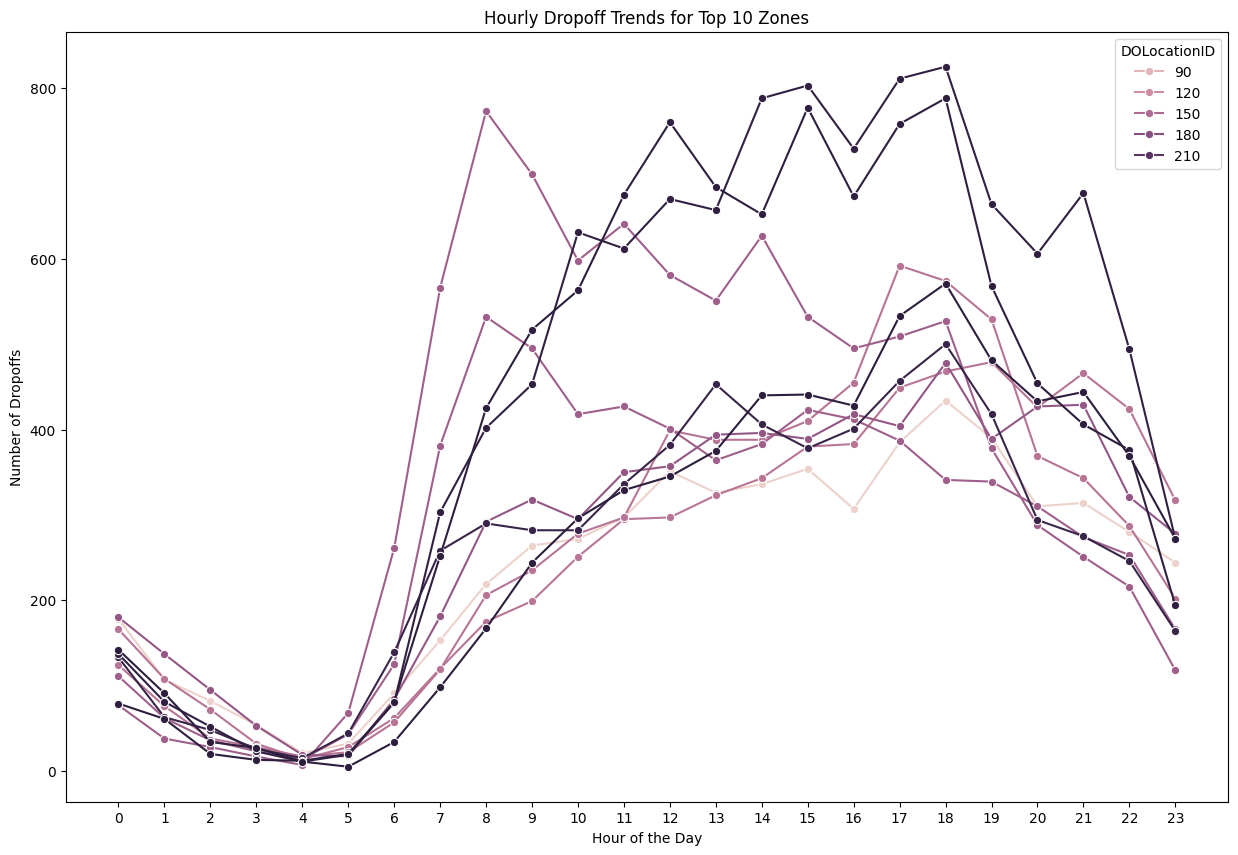

In [176]:
# Find top 10 pickup and dropoff zones


# Group by PULocationID and hour of the day to find the number of pickups
pickup_counts = merged_df.groupby(['PULocationID', 'pickup_time_derived']).size().reset_index(name='pickup_count')

# Find the top 10 zones with the highest number of hourly pickups
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index

# Filter the data to include only the top 10 pickup zones
top_pickup_data = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]

# Plot the hourly pickup trends for the top 10 zones
plt.figure(figsize=(15, 10))
sns.lineplot(data=top_pickup_data, x='pickup_time_derived', y='pickup_count', hue='PULocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.legend(title='PULocationID')
plt.xticks(range(24))
plt.show()

# Group by DOLocationID and hour of the day to find the number of dropoffs
dropoff_counts = merged_df.groupby(['DOLocationID', 'pickup_time_derived']).size().reset_index(name='dropoff_count')

# Find the top 10 zones with the highest number of hourly dropoffs
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index

# Filter the data to include only the top 10 dropoff zones
top_dropoff_data = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot the hourly dropoff trends for the top 10 zones
plt.figure(figsize=(15, 10))
sns.lineplot(data=top_dropoff_data, x='pickup_time_derived', y='dropoff_count', hue='DOLocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.legend(title='DOLocationID')
plt.xticks(range(24))
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [178]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate the number of pickups for each zone
pickup_counts = merged_df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

# Calculate the number of dropoffs for each zone
dropoff_counts = merged_df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

# Merge the pickup and dropoff counts
pickup_dropoff_counts = pickup_counts.merge(dropoff_counts, on='LocationID', how='outer').fillna(0)

# Calculate the ratio of pickups to dropoffs
pickup_dropoff_counts['pickup_dropoff_ratio'] = pickup_dropoff_counts['pickup_count'] / pickup_dropoff_counts['dropoff_count']

# Display the 10 highest pickup/dropoff ratios
highest_ratios = pickup_dropoff_counts.nlargest(10, 'pickup_dropoff_ratio')
print("10 Highest Pickup/Dropoff Ratios:")
print(highest_ratios[['LocationID', 'pickup_dropoff_ratio']])

# Display the 10 lowest pickup/dropoff ratios
lowest_ratios = pickup_dropoff_counts.nsmallest(10, 'pickup_dropoff_ratio')
print("\n10 Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios[['LocationID', 'pickup_dropoff_ratio']])

10 Highest Pickup/Dropoff Ratios:
     LocationID  pickup_dropoff_ratio
188         199                   inf
67           70             17.271186
123         132              4.684798
129         138              2.842422
175         186              1.686786
41           43              1.370921
106         114              1.368421
96          100              1.278592
153         162              1.255060
237         249              1.250414

10 Lowest Pickup/Dropoff Ratios:
    LocationID  pickup_dropoff_ratio
1            3                   0.0
3            5                   0.0
6            8                   0.0
7            9                   0.0
9           11                   0.0
13          15                   0.0
16          18                   0.0
17          19                   0.0
18          20                   0.0
19          21                   0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [180]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Filter the data for trips during night hours (11 PM to 5 AM)
night_hours_df = merged_df[(merged_df['pickup_time_derived'] >= 23) | (merged_df['pickup_time_derived'] <= 5)]

# Group by PULocationID to find the number of pickups during night hours
night_pickup_counts = night_hours_df['PULocationID'].value_counts().reset_index()
night_pickup_counts.columns = ['LocationID', 'pickup_count']

# Group by DOLocationID to find the number of dropoffs during night hours
night_dropoff_counts = night_hours_df['DOLocationID'].value_counts().reset_index()
night_dropoff_counts.columns = ['LocationID', 'dropoff_count']

# Find the top 10 pickup zones during night hours
top_night_pickup_zones = night_pickup_counts.nlargest(10, 'pickup_count')

# Find the top 10 dropoff zones during night hours
top_night_dropoff_zones = night_dropoff_counts.nlargest(10, 'dropoff_count')

# Display the top 10 pickup and dropoff zones during night hours
print("Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):")
print(top_night_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours (11 PM to 5 AM):")
print(top_night_dropoff_zones)


Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):
   LocationID  pickup_count
0          79          1996
1         249          1625
2         132          1492
3         148          1258
4          48          1206
5         114          1143
6         230           954
7         186           874
8          68           771
9         234           720

Top 10 Dropoff Zones during Night Hours (11 PM to 5 AM):
   LocationID  dropoff_count
0          79           1065
1         170            779
2          48            773
3         107            771
4         141            737
5          68            718
6         249            647
7         263            627
8         236            595
9         229            591


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

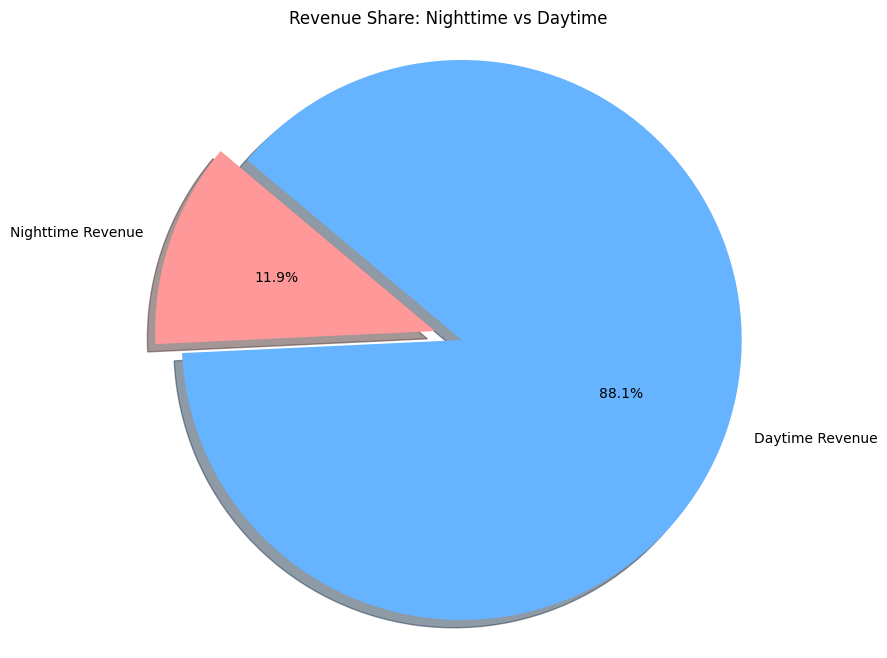

In [182]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = merged_df[(merged_df['pickup_time_derived'] >= 23) | (merged_df['pickup_time_derived'] <= 5)]

# Calculate total revenue for night hours
night_revenue = night_hours_df['total_amount'].sum()

# Filter for day hours (6 AM to 10 PM)
day_hours_df = merged_df[(merged_df['pickup_time_derived'] >= 6) & (merged_df['pickup_time_derived'] <= 22)]

# Calculate total revenue for day hours
day_revenue = day_hours_df['total_amount'].sum()

# Calculate the total revenue
total_revenue = merged_df['total_amount'].sum()

# Calculate the revenue share for night and day hours
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Visualize the revenue share using a pie chart
labels = ['Nighttime Revenue', 'Daytime Revenue']
sizes = [night_revenue_share, day_revenue_share]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Nighttime Revenue)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Revenue Share: Nighttime vs Daytime')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [184]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate the fare per mile for each trip
merged_df['fare_per_mile_derived'] = merged_df['fare_amount'] / merged_df['trip_distance']

# Group by passenger count and calculate the average fare per mile
avg_fare_per_mile = merged_df.groupby('passenger_count')['fare_per_mile_derived'].mean().reset_index()

# Calculate the average fare per mile per passenger
avg_fare_per_mile['fare_per_mile_per_passenger'] = avg_fare_per_mile['fare_per_mile_derived'] / avg_fare_per_mile['passenger_count']

# Display the results
avg_fare_per_mile



passenger_count  fare_per_mile_derived  fare_per_mile_per_passenger
0                1               9.104097                     9.104097
1                2              10.229796                     5.114898
2                3               8.256146                     2.752049
3                4              11.011238                     2.752810
4                5               7.608546                     1.521709
5                6               7.678992                     1.279832

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

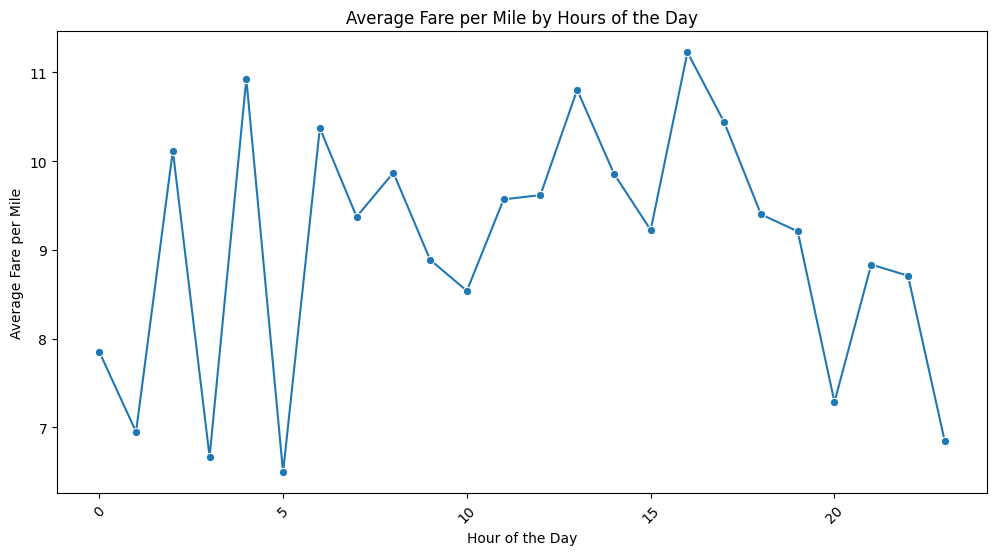

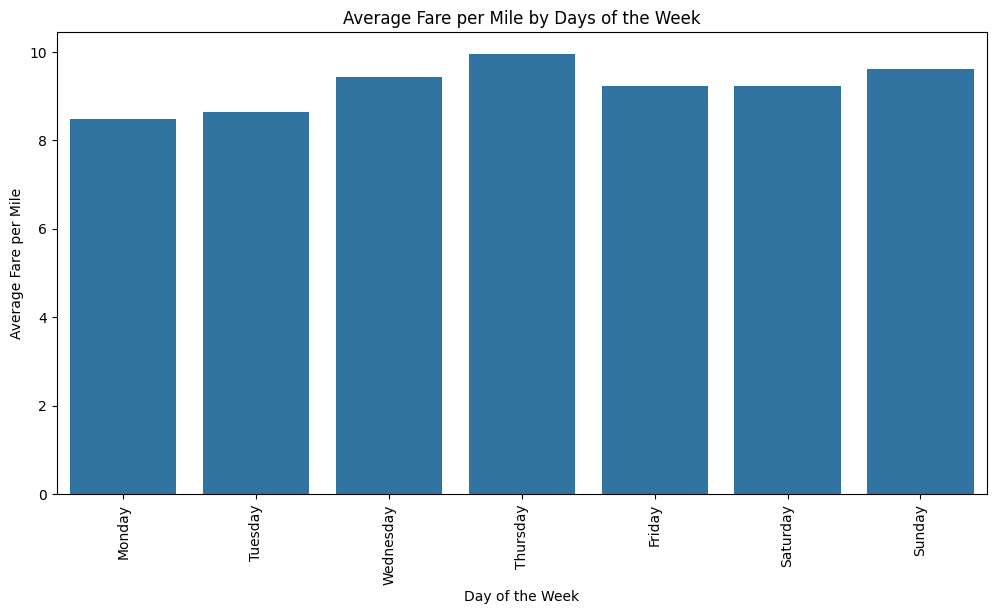

In [186]:
# Compare the average fare per mile for different days and for different times of the day
# Group by hour of the day and calculate the average fare per mile
avg_fare_per_mile_by_hour = merged_df.groupby('pickup_time_derived')['fare_per_mile_derived'].mean().reset_index()

# Group by day of the week and calculate the average fare per mile
avg_fare_per_mile_by_day = merged_df.groupby('pickup_day_derived')['fare_per_mile_derived'].mean().reset_index()

# Map the day of the week to the corresponding day name
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
avg_fare_per_mile_by_day['pickup_day_name'] = avg_fare_per_mile_by_day['pickup_day_derived'].map(day_name_map)

# Plot the average fare per mile by hours of the day
render_line_plot(avg_fare_per_mile_by_hour['pickup_time_derived'], avg_fare_per_mile_by_hour['fare_per_mile_derived'], 'Average Fare per Mile by Hours of the Day', 'Hour of the Day', 'Average Fare per Mile')

# Plot the average fare per mile by days of the week
render_bar_plot(avg_fare_per_mile_by_day['pickup_day_name'], avg_fare_per_mile_by_day['fare_per_mile_derived'], 'Average Fare per Mile by Days of the Week', 'Day of the Week', 'Average Fare per Mile')


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

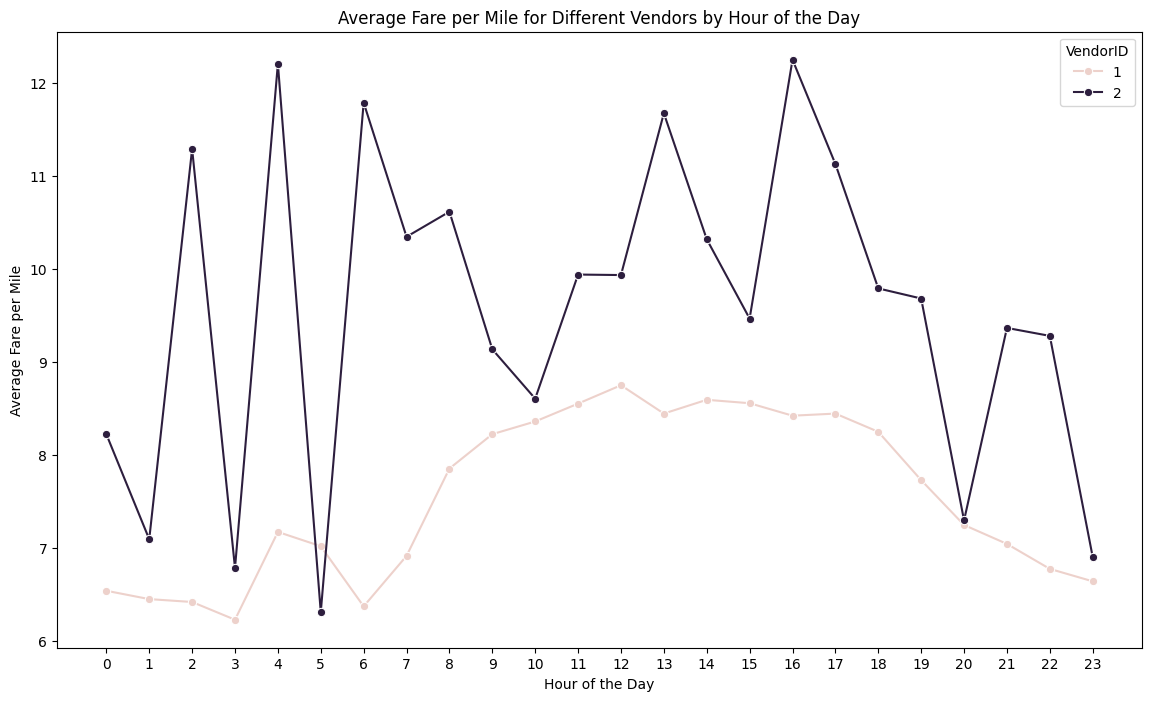

In [188]:
# Compare fare per mile for different vendors

# Group by VendorID and hour of the day to calculate the average fare per mile
avg_fare_per_mile_by_vendor_hour = merged_df.groupby(['VendorID', 'pickup_time_derived'])['fare_per_mile_derived'].mean().reset_index()

# Plot the average fare per mile for different vendors for different hours of the day
plt.figure(figsize=(14, 8))
sns.lineplot(x='pickup_time_derived', y='fare_per_mile_derived', hue='VendorID', data=avg_fare_per_mile_by_vendor_hour, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile for Different Vendors by Hour of the Day')
plt.xticks(range(24))
plt.legend(title='VendorID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [190]:
# Defining distance tiers
distance_tiers = [
    (0, 2),
    (2, 5),
    (5, float('inf'))
]

# Initialize a list to store the results
results = []

# Loop through each distance tier
for min_distance, max_distance in distance_tiers:
    # Filter the data for the current distance tier
    tier_df = merged_df[(merged_df['trip_distance'] > min_distance) & (merged_df['trip_distance'] <= max_distance)]
    
    # Group by VendorID and calculate the average fare per mile
    avg_fare_per_mile = tier_df.groupby('VendorID').apply(lambda x: (x['fare_amount'] / x['trip_distance']).mean()).reset_index()
    avg_fare_per_mile.columns = ['VendorID', 'avg_fare_per_mile']
    
    # Add the distance tier information
    avg_fare_per_mile['distance_tier'] = f'{min_distance} - {max_distance} miles'
    
    # Append the results to the list
    results.append(avg_fare_per_mile)

# Concatenate the results into a single DataFrame
fare_rate_comparison = pd.concat(results, ignore_index=True)

# Display the results
fare_rate_comparison


VendorID  avg_fare_per_mile  distance_tier
0         1           9.461356    0 - 2 miles
1         2          13.020957    0 - 2 miles
2         1           6.356253    2 - 5 miles
3         2           6.552461    2 - 5 miles
4         1           4.461368  5 - inf miles
5         2           4.503706  5 - inf miles

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

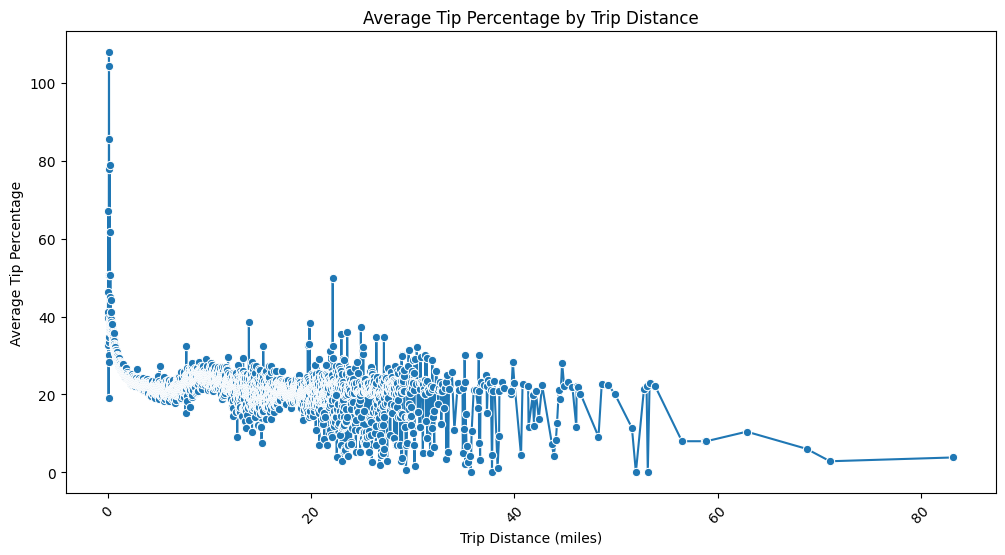

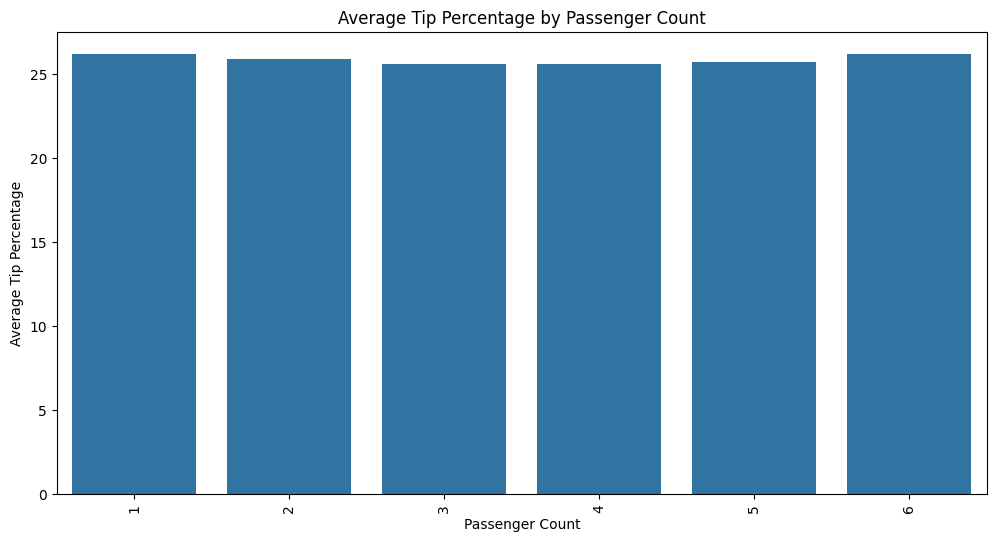

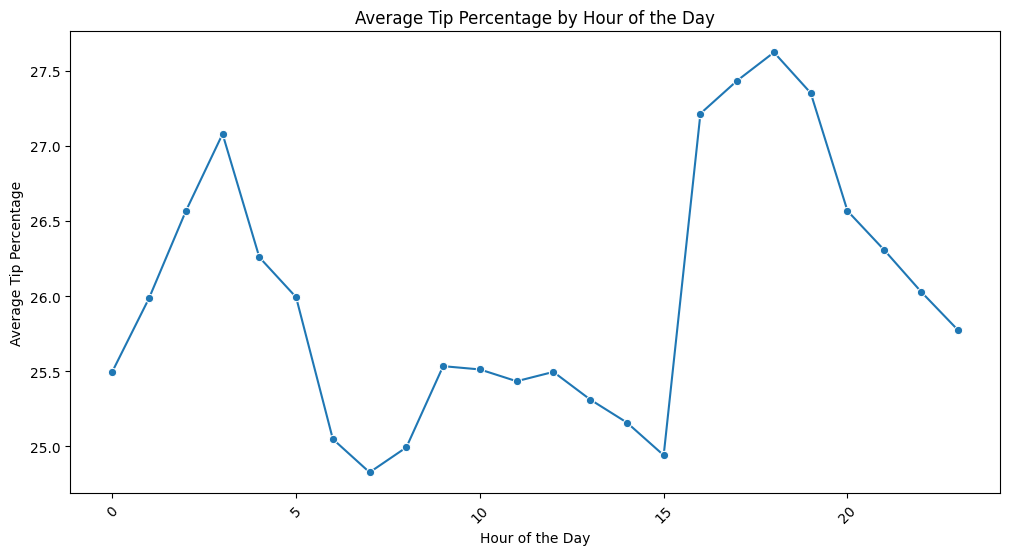

In [192]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate the tip percentage for each trip
merged_df['tip_percentage_derived'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100

# Group by trip distance and calculate the average tip percentage
avg_tip_by_distance = merged_df.groupby('trip_distance')['tip_percentage_derived'].mean().reset_index()

# Group by passenger count and calculate the average tip percentage
avg_tip_by_passenger_count = merged_df.groupby('passenger_count')['tip_percentage_derived'].mean().reset_index()

# Group by hour of the day and calculate the average tip percentage
avg_tip_by_hour = merged_df.groupby('pickup_time_derived')['tip_percentage_derived'].mean().reset_index()

# Plot the average tip percentage by trip distance
render_line_plot(avg_tip_by_distance['trip_distance'], avg_tip_by_distance['tip_percentage_derived'], 'Average Tip Percentage by Trip Distance', 'Trip Distance (miles)', 'Average Tip Percentage')

# Plot the average tip percentage by passenger count
render_bar_plot(avg_tip_by_passenger_count['passenger_count'], avg_tip_by_passenger_count['tip_percentage_derived'], 'Average Tip Percentage by Passenger Count', 'Passenger Count', 'Average Tip Percentage')

# Plot the average tip percentage by hour of the day
render_line_plot(avg_tip_by_hour['pickup_time_derived'], avg_tip_by_hour['tip_percentage_derived'], 'Average Tip Percentage by Hour of the Day', 'Hour of the Day', 'Average Tip Percentage')

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

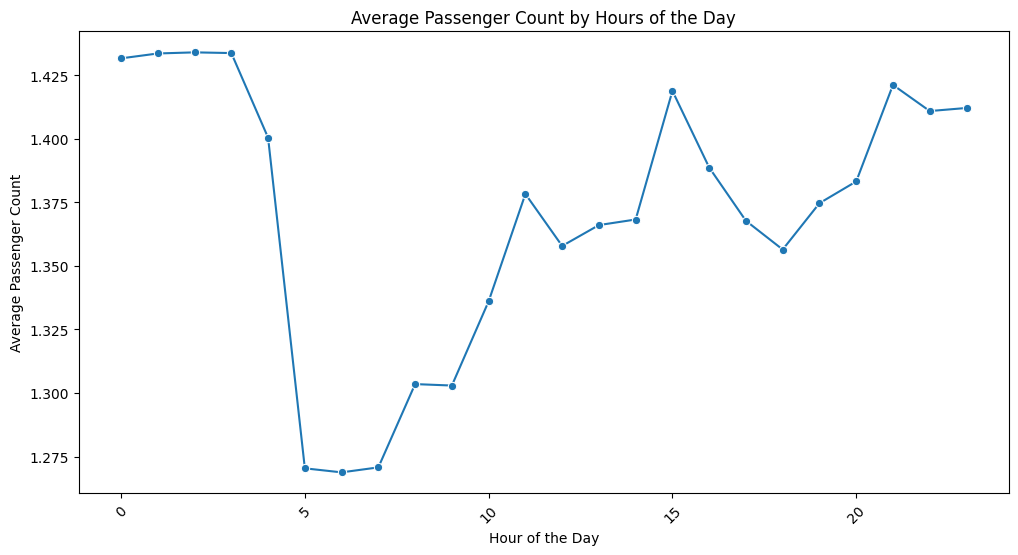

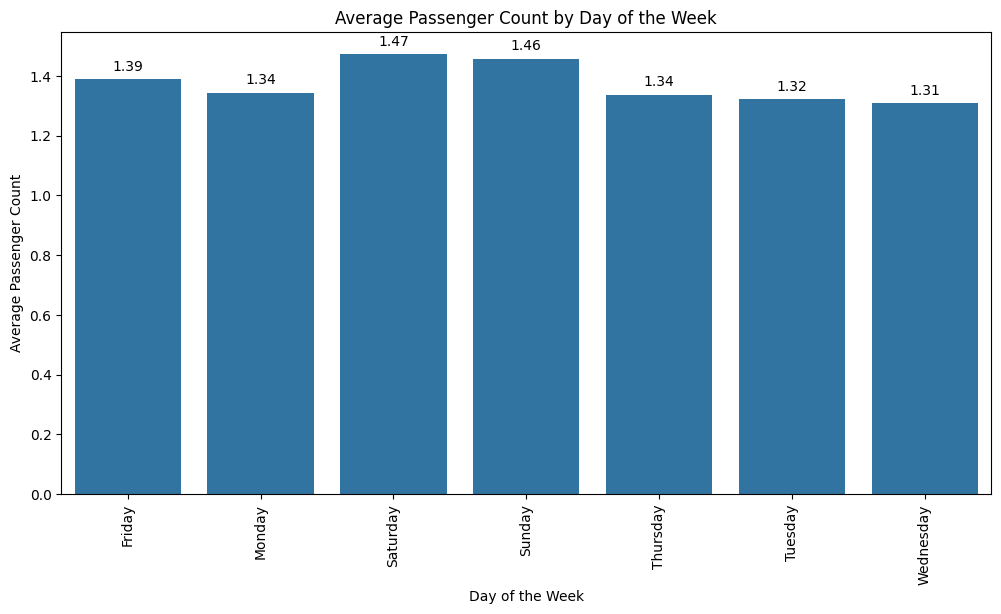

In [194]:
# See how passenger count varies across hours and days

# Group by hour of the day and calculate the average passenger count
avg_passenger_count_by_hour = merged_df.groupby('pickup_time_derived')['passenger_count'].mean().reset_index()

# Group by day of the week and calculate the average passenger count
avg_passenger_count_by_day = merged_df.groupby('pickup_day_name_derived')['passenger_count'].mean().reset_index()

# Plot the average passenger count by hours of the day
render_line_plot(avg_passenger_count_by_hour['pickup_time_derived'], avg_passenger_count_by_hour['passenger_count'], 'Average Passenger Count by Hours of the Day', 'Hour of the Day', 'Average Passenger Count')

# Plot the average passenger count by days of the week
render_bar_plot(avg_passenger_count_by_day['pickup_day_name_derived'], avg_passenger_count_by_day['passenger_count'], 'Average Passenger Count by Day of the Week', 'Day of the Week', 'Average Passenger Count', show_data_labels=True)



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

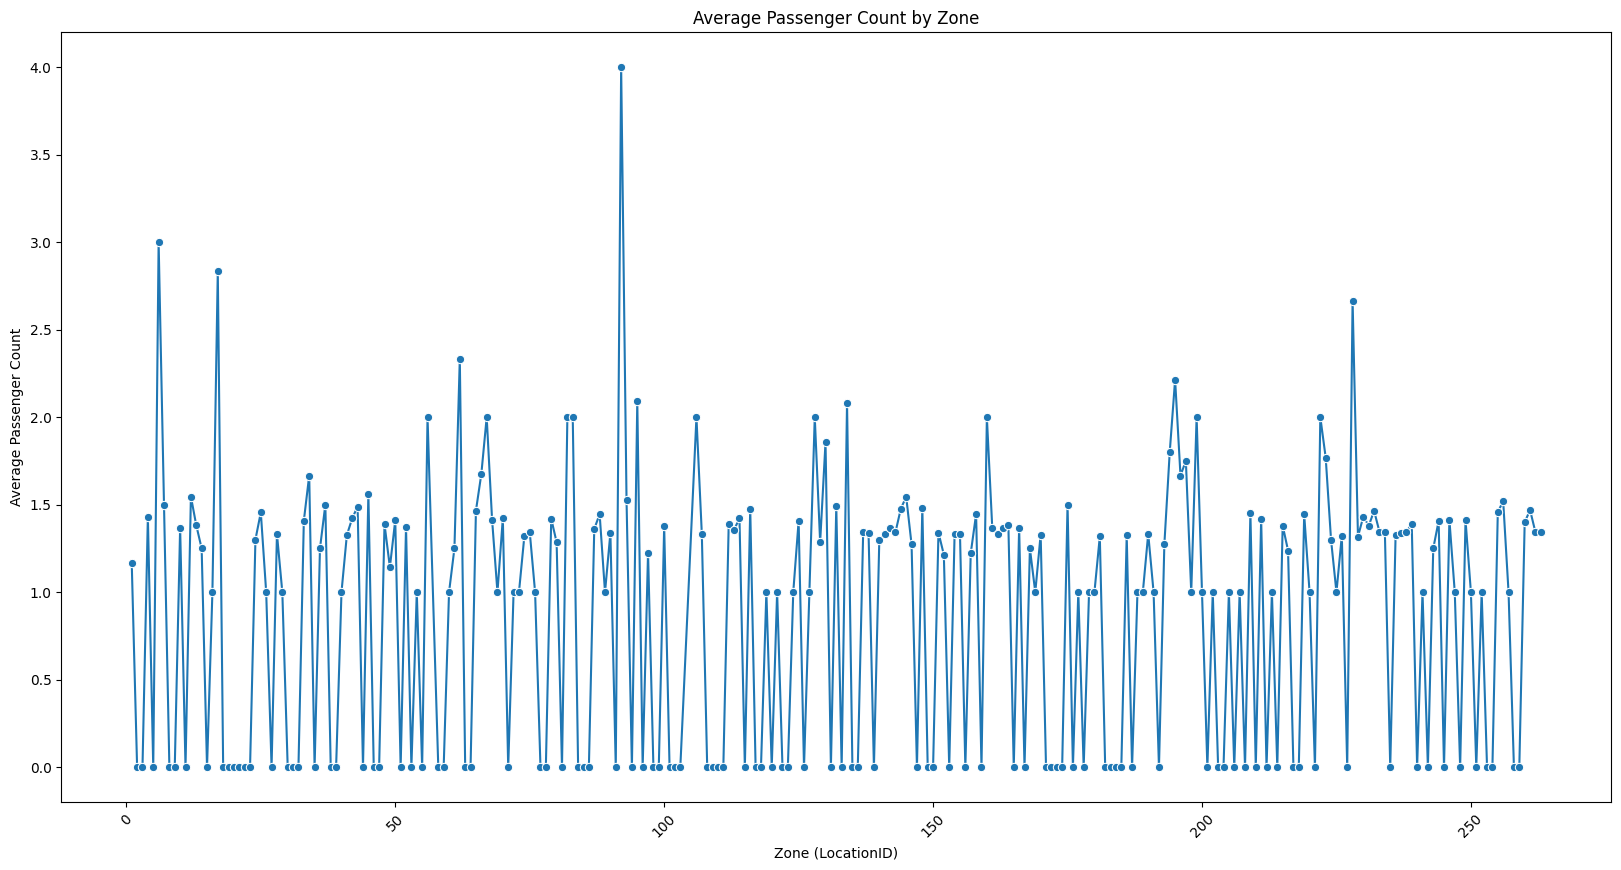

In [196]:
# How does passenger count vary across zones

# Group by PULocationID and calculate the average passenger count for each zone
avg_passenger_count_by_zone = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge the average passenger count with the zones GeoDataFrame
zones_with_passenger_count = zones.merge(avg_passenger_count_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values with 0 (for zones with no trips)
zones_with_passenger_count['passenger_count'].fillna(0, inplace=True)

# Plot the average passenger count for each zone using a bar plot
render_line_plot(zones_with_passenger_count.LocationID, zones_with_passenger_count.passenger_count, 'Average Passenger Count by Zone', 'Zone (LocationID)', 'Average Passenger Count', figsize=(20, 10))

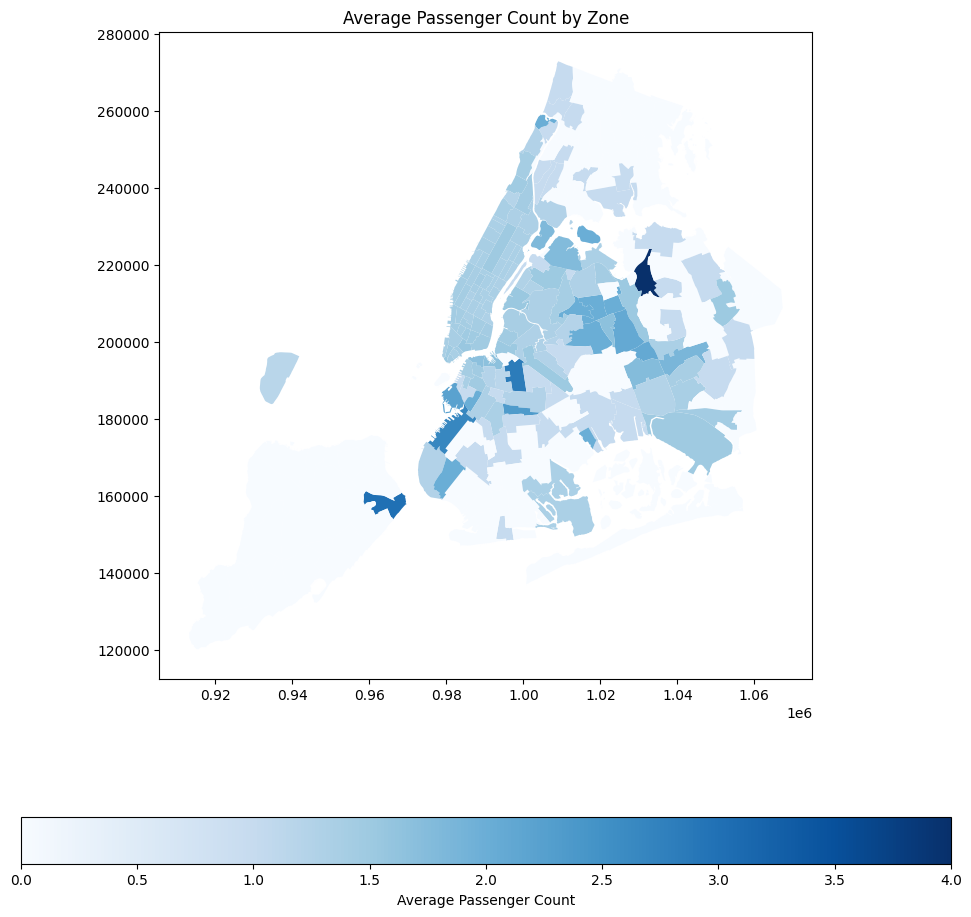

In [198]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Calculate the average passenger count for each zone
avg_passenger_count_by_zone = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge the average passenger count with the zones_with_trips GeoDataFrame
zones_with_trips = zones_with_trips.merge(avg_passenger_count_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values with 0 (for zones with no trips)
zones_with_trips['passenger_count'].fillna(0, inplace=True)

# Plot the average passenger count for each zone using a Geo Plot
zones_with_trips.plot(column='passenger_count', cmap='Blues', legend=True, legend_kwds={'label': "Average Passenger Count", 'orientation': "horizontal"}, figsize=(12, 12))
plt.title('Average Passenger Count by Zone')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [200]:
# How often is each surcharge applied?
# Calculate the frequency of each surcharge
surcharge_columns = ['extra', 'congestion_surcharge', 'airport_fee_combined', 'improvement_surcharge']
surcharge_frequencies = merged_df[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()
surcharge_frequencies.columns = ['Surcharge', 'Frequency']

# Display the frequency of each surcharge
print("Frequency of each surcharge:")
print(surcharge_frequencies)


Frequency of each surcharge:
               Surcharge  Frequency
0                  extra     141821
1   congestion_surcharge     212250
2   airport_fee_combined      18264
3  improvement_surcharge     223548


In [202]:
# Analyze the pickup zones where surcharges are applied more frequently
pickup_surcharge_zones = merged_df[merged_df[surcharge_columns].sum(axis=1) > 0].groupby('PULocationID').size().reset_index(name='surcharge_count')
pickup_surcharge_zones = pickup_surcharge_zones.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left').sort_values(by='surcharge_count', ascending=False)

# Display the top pickup zones with surcharges
print("Top pickup zones with surcharges:")
print(pickup_surcharge_zones.head(10))

Top pickup zones with surcharges:
     PULocationID  surcharge_count  LocationID                          zone
140           237            10961       237.0         Upper East Side South
91            161            10766       161.0                Midtown Center
72            132            10077       132.0                   JFK Airport
139           236             9998       236.0         Upper East Side North
92            162             8434       162.0                  Midtown East
75            138             8027       138.0             LaGuardia Airport
104           186             7825       186.0  Penn Station/Madison Sq West
78            142             7700       142.0           Lincoln Square East
134           230             7001       230.0     Times Sq/Theatre District
98            170             6756       170.0                   Murray Hill


In [204]:
# Analyze the dropoff zones where surcharges are applied more frequently
dropoff_surcharge_zones = merged_df[merged_df[surcharge_columns].sum(axis=1) > 0].groupby('DOLocationID').size().reset_index(name='surcharge_count')
dropoff_surcharge_zones = dropoff_surcharge_zones.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left').sort_values(by='surcharge_count', ascending=False)

# Display the top dropoff zones with surcharges
print("Top dropoff zones with surcharges:")
print(dropoff_surcharge_zones.head(10))

Top dropoff zones with surcharges:
     DOLocationID  surcharge_count  LocationID                       zone
224           236            10800       236.0      Upper East Side North
225           237             9808       237.0      Upper East Side South
153           161             8846       161.0             Midtown Center
154           162             6720       162.0               Midtown East
162           170             6701       170.0                Murray Hill
227           239             6610       239.0      Upper West Side South
134           142             6433       142.0        Lincoln Square East
218           230             6290       230.0  Times Sq/Theatre District
133           141             6277       141.0            Lenox Hill West
66             68             5801        68.0               East Chelsea


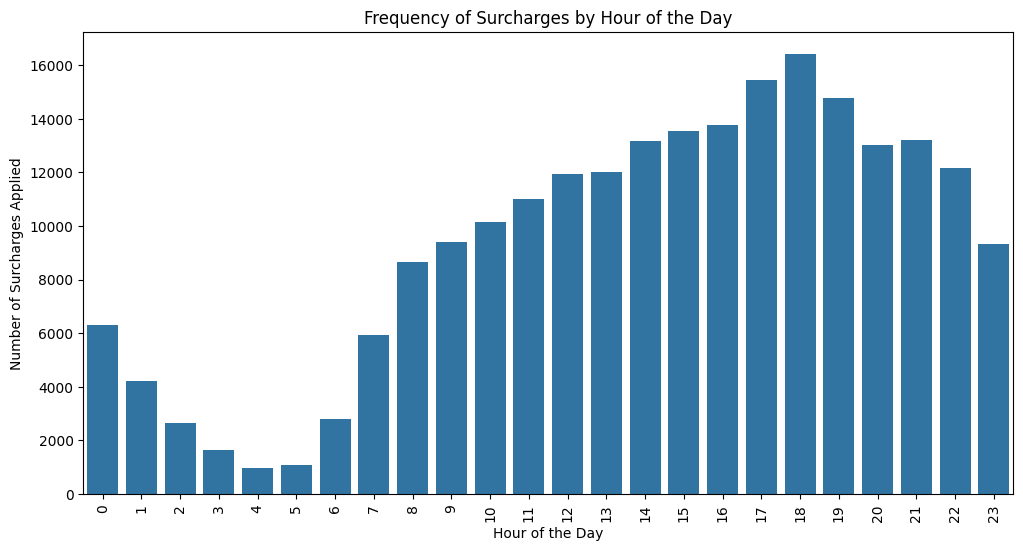

In [206]:
# Analyze the times when surcharges are applied more frequently
merged_df['surcharge_applied_derived'] = merged_df[surcharge_columns].sum(axis=1) > 0
surcharge_by_hour = merged_df.groupby('pickup_time_derived')['surcharge_applied_derived'].sum().reset_index()

# Plot the frequency of surcharges by hour of the day
render_bar_plot(surcharge_by_hour['pickup_time_derived'], surcharge_by_hour['surcharge_applied_derived'], 'Frequency of Surcharges by Hour of the Day', 'Hour of the Day', 'Number of Surcharges Applied')

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [208]:
Based on the analysis of demand patterns and operational inefficiencies, below are some recommendations:
- Allocate more cabs during peak day hours (6 AM to 10 PM) based on the analysis at section 3.2.2.
- Implement surge pricing in high-demand zones during daytime peak periods.
- Adjust pricing according to the time of day and day of the week, based on the analysis of average fare per mile for different hours and days. (Derived from section 3.2.4 and 3.2.10)
- As an outcome for the analysis conducted at section 3.2.7, we should increase number of cabs in high-demand pickup and dropoff zones during night hours (11 PM to 5 AM).
- Repositioning algorithms can be introduced for cabs positioning to fulfill the demand surges in these areas.

SyntaxError: invalid syntax (388756484.py, line 1)

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

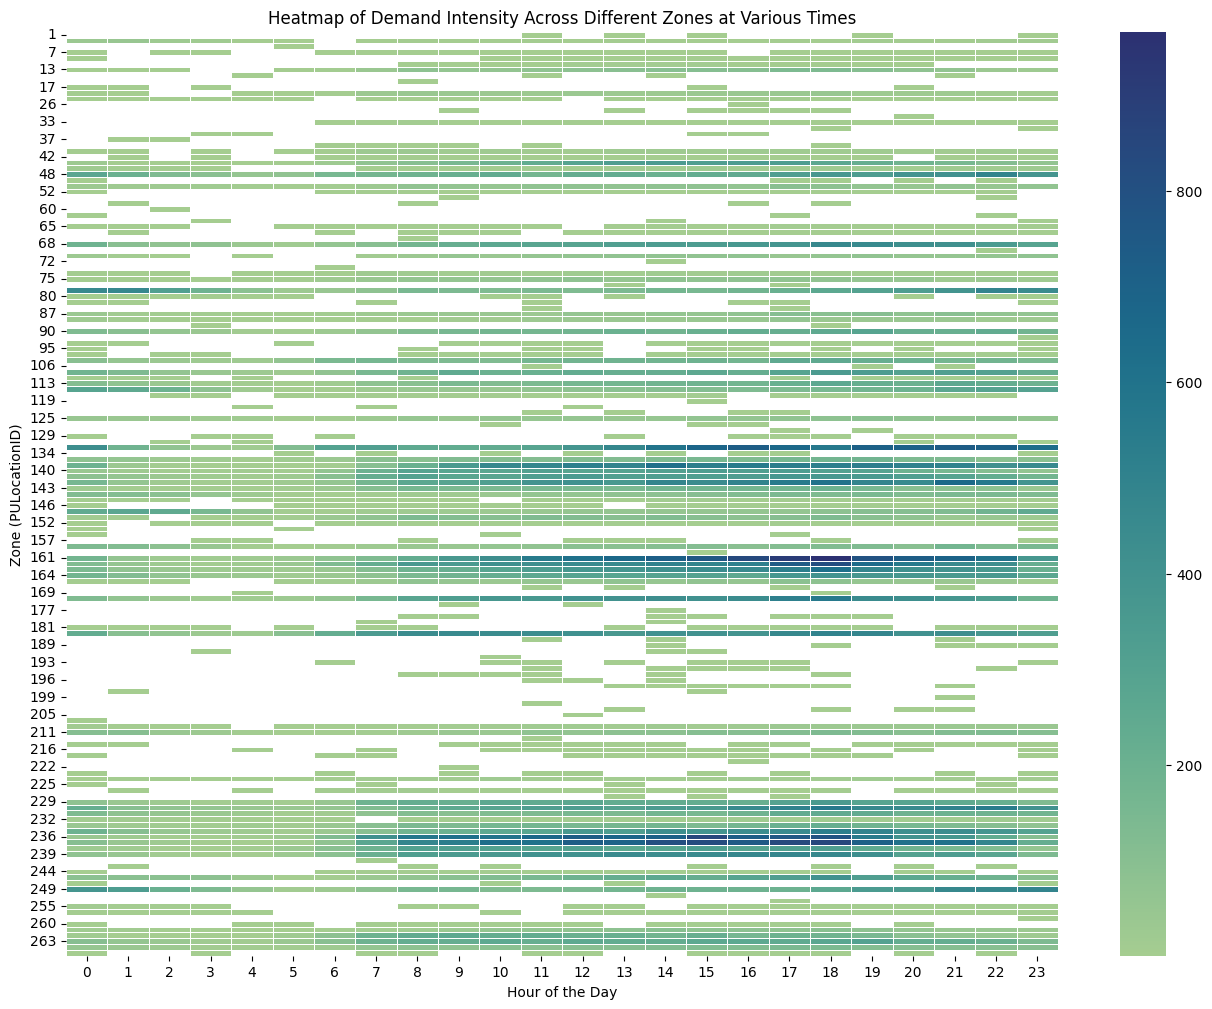

In [210]:
# Aggregate trip counts and passenger counts by zone and time
demand_data = merged_df.groupby(['PULocationID', 'pickup_time_derived']).agg({
    'passenger_count': 'sum',
    'PULocationID': 'count'
}).rename(columns={'PULocationID': 'trip_count'}).reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = demand_data.pivot(index='PULocationID', columns='pickup_time_derived', values='trip_count')

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap="crest", linewidths=0.5)
plt.title('Heatmap of Demand Intensity Across Different Zones at Various Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Zone (PULocationID)')
plt.show()

In [212]:
Suggestions on strategically positioning cabs based on trip trends:
- From the above heatmap we can identify zones with high demand during peak hours (e.g., rush hour, evenings).
- Position more cabs in these high-demand zones during peak times to reduce wait times and improve customer satisfaction.
- Observe how demand fluctuates throughout the day.
- Adjust cab deployment accordingly, increasing presence during peak periods and reducing it during lulls.
- Deploy more cabs on weekdays during peak hours and adjust deployment for weekend demand patterns, which might be concentrated in specific areas or times. (Derived from 3.2.4)
- Position cabs strategically to efficiently serve short and long-distance trips, optimizing overall efficiency.

SyntaxError: invalid syntax (3676952588.py, line 1)

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [214]:
Below are recommendations for data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors:
- Monthly revenue is very low in July, August, September company can offer competative price as compared to other vendor during these month which can incrase pickup during that time and also revenue will increase.
- Correlation between Trip Duration and Fare Amount  is very low. Company can impose waiting charge for the ride which will increse the corrreation between these two variables.
- Fare amount depended on count of pessenger can also increase the revenue for the company.
- Consider using machine learning models to predict demand elasticity for various distances. This would allow more precise price adjustments.

SyntaxError: invalid non-printable character U+00A0 (583316383.py, line 4)